In [3261]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [3262]:
#reading the dataset
houses = pd.read_csv('C:\\Users\\Lokesh Gupta\\Documents\\Kavita\\upgrad\\Advanced_regression\\assignment\\train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3263]:
#understanding the data types and genearal information
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3264]:
#checking and handling NULL Values
#getting percentage of NULL values for columns where null value are present
(houses[houses.columns[houses.isna().sum() >0]].isna().sum()/len(houses) ) *100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [3265]:
#Alley,PoolQC,Fence,MiscFeature,FireplaceQu seems to have many NULL values , we can drop those columns
houses.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3266]:
#again checking percentage of NULL values after removing high percentage columns
(houses[houses.columns[houses.isna().sum() >0]].isna().sum()/len(houses) ) *100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [3267]:
#checking spread of value for LotFrontage
print(houses['LotFrontage'].describe())
print(houses['LotFrontage'].isna().sum())


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
259


In [3268]:
#since mean value seems to be 70 and this variable doesn't seems to be more critical we can update the NULL values to the mean value of 70
houses['LotFrontage'].fillna(70,inplace=True)
houses['LotFrontage'].isna().sum()

0

In [3269]:
houses['LotFrontage'].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [3270]:
#checking spread of value for MasVnrType
print(houses['MasVnrType'].value_counts())
print(houses['MasVnrType'].isna().sum())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
8


In [3271]:
#since more values have None we can update the NULL values to None
houses['MasVnrType'].fillna('None',inplace=True)
houses['MasVnrType'].isna().sum()

0

In [3272]:
houses['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [3273]:
#checking spread of value for MasVnrArea
print(houses['MasVnrArea'].describe())
print(houses['MasVnrArea'].isna().sum())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
8


In [3274]:
#since mean value seems to be 103 and only 8 value are mising and this variable doesn't seems to be more critical we can update the NULL values to the mean value of 70
houses['MasVnrArea'].fillna(103,inplace=True)
houses['MasVnrArea'].isna().sum()

0

In [3275]:
#checking spread for BsmtQual
print(houses['BsmtQual'].value_counts())
print(houses['BsmtQual'].isna().sum())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
37


In [3276]:
#since as per Data dictionary TA - means typical and value is high for this. we can update the NULL values to TA
houses['BsmtQual'].fillna('TA',inplace=True)
houses['BsmtQual'].isna().sum()

0

In [3277]:
print(houses['BsmtQual'].value_counts())

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [3278]:
#checking spread for BsmtCond
print(houses['BsmtCond'].value_counts())
print(houses['BsmtCond'].isna().sum())

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
37


In [3279]:
#since as per Data dictionary TA - means typical and value is high for this. we can update the NULL values to TA
houses['BsmtCond'].fillna('TA',inplace=True)
print(houses['BsmtCond'].isna().sum())
print(houses['BsmtCond'].value_counts())

0
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [3280]:
#checking spread for BsmtExposure
print(houses['BsmtExposure'].value_counts())
print(houses['BsmtExposure'].isna().sum())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
38


In [3281]:
#since as per Data dictionary No - means No Exposure and value is high for this. we can update the NULL values to No
houses['BsmtExposure'].fillna('No',inplace=True)
print(houses['BsmtExposure'].isna().sum())
print(houses['BsmtExposure'].value_counts())

0
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [3282]:
#checking spread for BsmtFinType1
print(houses['BsmtFinType1'].value_counts())
print(houses['BsmtFinType1'].isna().sum())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
37


In [3283]:
#since as per Data dictionary NA - means No Basement. we can update the NULL values to NA, 
#since only 37 values needs to be updated
houses['BsmtFinType1'].fillna('NA',inplace=True)
print(houses['BsmtFinType1'].isna().sum())
print(houses['BsmtFinType1'].value_counts())

0
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


In [3284]:
#checking the spread for BsmtFinType2
print(houses['BsmtFinType2'].value_counts())
print(houses['BsmtFinType2'].isna().sum())

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
38


In [3285]:
#since as per Data dictionary Unf - means Unfinshed and value is high for this. we can update the NULL values to Unf, 
#since only 37 values needs to be updated
houses['BsmtFinType2'].fillna('Unf',inplace=True)
print(houses['BsmtFinType2'].isna().sum())
print(houses['BsmtFinType2'].value_counts())

0
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [3286]:
#checking spread for Electrical
print(houses['Electrical'].value_counts())
print(houses['Electrical'].isna().sum())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


In [3287]:
#since as per Data dictionary  SBrkr - means Standard Circuit Breakers & Romex and value is high for this. we can update the NULL values to SBrkr, 
#since only 1 value needs to be updated
houses['Electrical'].fillna('SBrkr',inplace=True)
print(houses['Electrical'].isna().sum())
print(houses['Electrical'].value_counts())

0
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [3288]:
#checking spread of GarageType
print(houses['GarageType'].value_counts())
print(houses['GarageType'].isna().sum())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
81


In [3289]:
#since as per Data dictionary  Attchd - means Attached to home and value is high for this. we can update the NULL values to Attchd, 
#since only 81 value needs to be updated
houses['GarageType'].fillna('Attchd',inplace=True)
print(houses['GarageType'].isna().sum())
print(houses['GarageType'].value_counts())

0
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [3290]:
houses[['GarageYrBlt','YearBuilt']].corr()
#Since GarageYrBlt and YearBuilt is highly correlation we can drop GarageYrBlt
houses.drop('GarageYrBlt',axis=1,inplace=True)
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3291]:
#checking spread of GarageFinish
print(houses['GarageFinish'].value_counts())
print(houses['GarageFinish'].isna().sum())

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
81


In [3292]:
#since as per Data dictionary NA - means No Garage. we can update the NULL values to NA, 
#since only 81 values needs to be updated
houses['GarageFinish'].fillna('NA',inplace=True)
print(houses['GarageFinish'].isna().sum())
print(houses['GarageFinish'].value_counts())

0
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64


In [3293]:
#checking spread of GarageQual
print(houses['GarageQual'].value_counts())
print(houses['GarageQual'].isna().sum())

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
81


In [3294]:
#since as per Data dictionary TA - means Unfinshed and value is high for this. we can update the NULL values to TA, 
#since only 81 values needs to be updated
houses['GarageQual'].fillna('TA',inplace=True)
print(houses['GarageQual'].isna().sum())
print(houses['GarageQual'].value_counts())

0
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [3295]:
#checking spread of GarageCond
print(houses['GarageCond'].value_counts())
print(houses['GarageCond'].isna().sum())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
81


In [3296]:
#since as per Data dictionary TA - means Unfinshed and value is high for this. we can update the NULL values to TA, 
#since only 81 values needs to be updated
houses['GarageCond'].fillna('TA',inplace=True)
print(houses['GarageCond'].isna().sum())
print(houses['GarageCond'].value_counts())

0
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [3297]:
#again checking percentage of NULL values after updates of NULL values
(houses[houses.columns[houses.isna().sum() >0]].isna().sum()/len(houses) ) *100

Series([], dtype: float64)

In [3298]:
##checking data types as per data dictionary and correcting if needed
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3299]:
#Id column is just and id, so we can remove that
houses.drop(['Id'],axis=1,inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [3300]:
#YearRemodAdd column Remodel date (same as construction date if no remodeling or additions), we dont have information about remodelling \n
#so we can remove this as we already have construcntion year as year built
houses.drop(['YearRemodAdd'],axis=1,inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  RoofStyl

In [3301]:
#MoSold column is not needed as we have yrsold
houses.drop(['MoSold'],axis=1,inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  RoofStyl

In [3302]:
#checking range for YearBuilt 
print(houses['YearBuilt'].describe())
print(houses['YearBuilt'].value_counts())

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951    

In [3303]:
#we can convert yearbuilt as range variable
houses['YearBuiltRange'] = houses['YearBuilt'].apply(lambda x :'1801-1900' if x >= 1801 and x<= 1900 else ('1901-2000' if x >= 1901 and x<= 2000 else '2001-2010'))   
print(houses['YearBuiltRange'].value_counts())
houses.drop('YearBuilt',axis = 1, inplace = True)
print(houses.info())

1901-2000    1071
2001-2010     364
1801-1900      25
Name: YearBuiltRange, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   in

In [3304]:
#check distinct values for Yrsold
print(houses['YrSold'].value_counts())


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


In [3305]:
print(houses.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  RoofStyle       1460 non-null   o

In [3306]:
houses['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [3307]:
#MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,MoSold,YrSold is categorial variable as per Data dictionary, so lets change the date type of object, so that it wouldb easy for plotting
cat_variables = ['MSSubClass','OverallQual','OverallCond','YearBuiltRange','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YrSold']
houses[cat_variables]=houses[cat_variables].astype('object')
#print(houses['MSSubClass'].astype('object').value_counts())
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   object 
 16  OverallCond     1460 non-null   object 
 17  RoofStyle       1460 non-null   o

In [3308]:
#Getting all int and float variables
numeric_vars = houses.select_dtypes('int64','float64')
numeric_vars
print(numeric_vars.columns)

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


In [3309]:
numeric_vars.columns[1]

'BsmtFinSF1'

<Axes: >

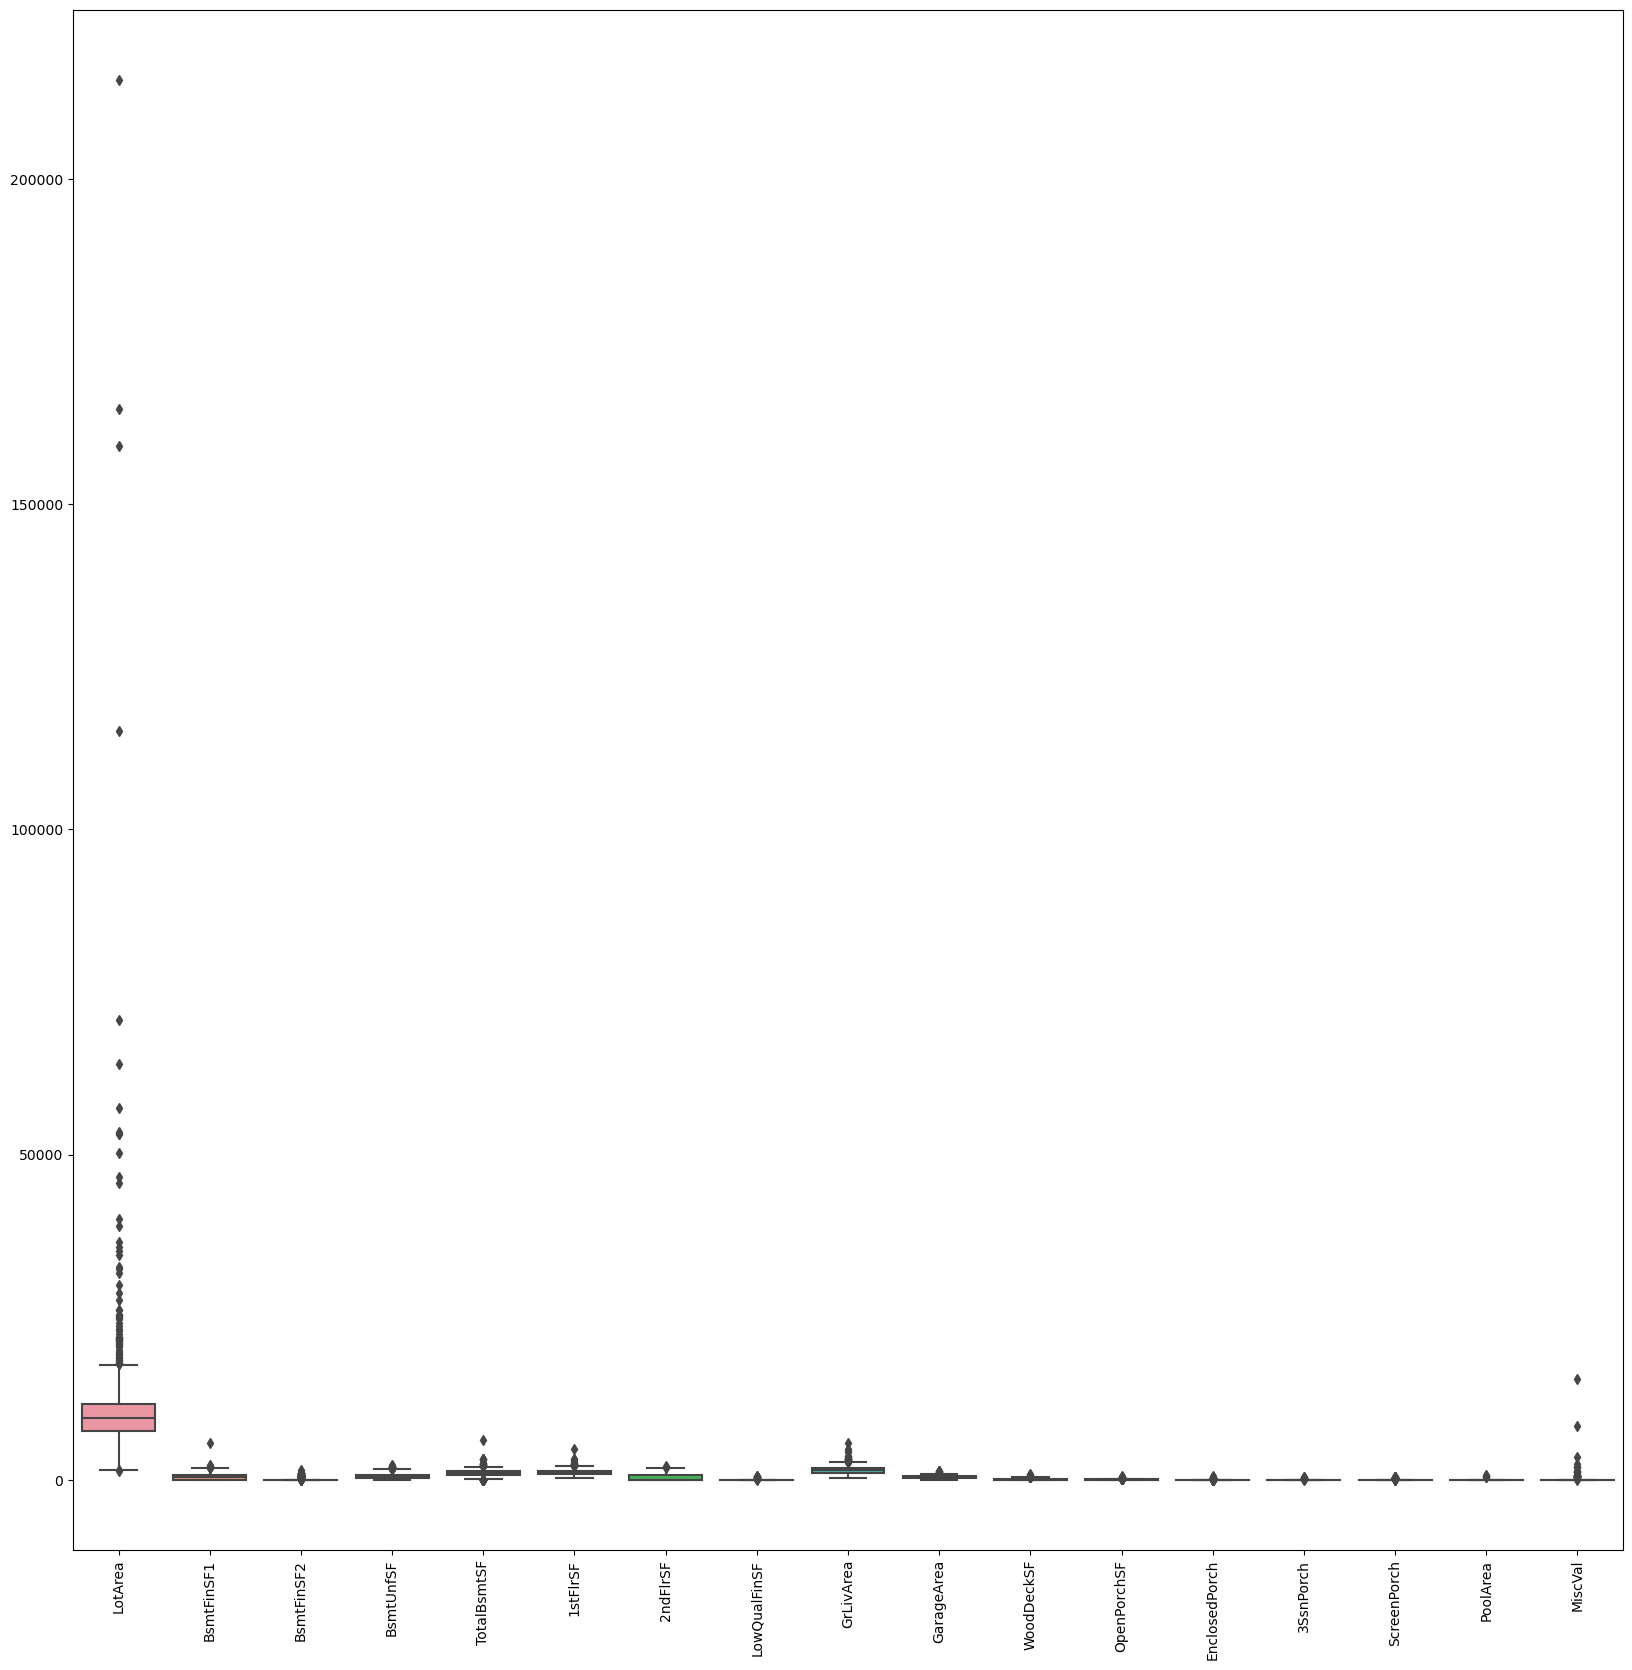

In [3310]:
#plotting for numeric varaibles
plt.figure(figsize = (20,20))
plt.xticks(rotation = 90)
sns.boxplot(numeric_vars.drop('SalePrice',axis=1))

In [3311]:
#checking outliers for numeric varaibles
for i in range(1,len(numeric_vars.columns)):
    print(numeric_vars.columns[i-1])
    print(numeric_vars.iloc[:,i-1].quantile([0.05,0.25,0.5,0.75,0.95,0.99]))

LotArea
0.05     3311.70
0.25     7553.50
0.50     9478.50
0.75    11601.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64
BsmtFinSF1
0.05       0.00
0.25       0.00
0.50     383.50
0.75     712.25
0.95    1274.00
0.99    1572.41
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2
0.05      0.00
0.25      0.00
0.50      0.00
0.75      0.00
0.95    396.20
0.99    830.38
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF
0.05       0.00
0.25     223.00
0.50     477.50
0.75     808.00
0.95    1468.00
0.99    1797.05
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF
0.05     519.30
0.25     795.75
0.50     991.50
0.75    1298.25
0.95    1753.00
0.99    2155.05
Name: TotalBsmtSF, dtype: float64
1stFlrSF
0.05     672.95
0.25     882.00
0.50    1087.00
0.75    1391.25
0.95    1831.25
0.99    2219.46
Name: 1stFlrSF, dtype: float64
2ndFlrSF
0.05       0.00
0.25       0.00
0.50       0.00
0.75     728.00
0.95    1141.05
0.99    1418.92
Name: 2ndFlrSF, dtype: float64
LowQualFinSF
0.05      0.0
0.25   

In [3312]:
print(houses['LowQualFinSF'].value_counts())
len(houses[houses['LowQualFinSF']==0])/len(houses['LowQualFinSF']) * 100


0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64


98.21917808219179

In [3313]:
#removing outlier values for LotArea
#houses['LotArea'] = houses['LotArea'][houses['LotArea'].quantile(0.99)]
#houses['LotArea'][houses['LotArea'] <= houses['LotArea'].quantile(0.99)]
#houses['LotArea'].quantile(0.99)
#print(houses['LotArea'][(houses['LotArea'] < houses['LotArea'].quantile(0.99))].quantile([0.05,0.25,0.5,0.75,0.95,0.99]))
#houses['LotArea'] = houses['LotArea'][(houses['LotArea'] < houses['LotArea'].quantile(0.99))]
#print(houses['LotArea'].quantile([0.05,0.25,0.5,0.75,0.95,0.99]))
houses= houses[(houses['LotArea'] <= houses['LotArea'].quantile(0.95))]

In [3314]:
#Getting all int and float variables again and checking outliers
numeric_vars = houses.select_dtypes('int64','float64')
numeric_vars
print(numeric_vars.columns)
for i in range(1,len(numeric_vars.columns)):
    print(numeric_vars.columns[i-1])
    print(numeric_vars.iloc[:,i-1].quantile([0.05,0.25,0.5,0.75,0.95,0.99]))

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')
LotArea
0.05     3196.0
0.25     7411.0
0.50     9247.0
0.75    11208.5
0.95    14539.5
0.99    16570.5
Name: LotArea, dtype: float64
BsmtFinSF1
0.05       0.00
0.25       0.00
0.50     378.00
0.75     697.00
0.95    1233.10
0.99    1521.08
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2
0.05      0.0
0.25      0.0
0.50      0.0
0.75      0.0
0.95    374.7
0.99    720.7
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF
0.05       0.0
0.25     226.0
0.50     479.0
0.75     802.0
0.95    1476.4
0.99    1800.0
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF
0.05     490.70
0.25     790.50
0.50     980.00
0.75    1267.50
0.95    1728.00
0.99    2111.54
Name: TotalBsmtSF, dtype: float64
1stFlrSF
0.05     672.00
0.25

In [3315]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1387 non-null   object 
 1   MSZoning        1387 non-null   object 
 2   LotFrontage     1387 non-null   float64
 3   LotArea         1387 non-null   int64  
 4   Street          1387 non-null   object 
 5   LotShape        1387 non-null   object 
 6   LandContour     1387 non-null   object 
 7   Utilities       1387 non-null   object 
 8   LotConfig       1387 non-null   object 
 9   LandSlope       1387 non-null   object 
 10  Neighborhood    1387 non-null   object 
 11  Condition1      1387 non-null   object 
 12  Condition2      1387 non-null   object 
 13  BldgType        1387 non-null   object 
 14  HouseStyle      1387 non-null   object 
 15  OverallQual     1387 non-null   object 
 16  OverallCond     1387 non-null   object 
 17  RoofStyle       1387 non-null   o

In [3316]:
#98% values are 0  and other values are mostly 1  we can remove this column 
houses.drop('LowQualFinSF',axis=1,inplace=True)


In [3317]:
print(houses['ScreenPorch'].value_counts())
len(houses[houses['ScreenPorch']==0])/len(houses['ScreenPorch']) * 100

0      1280
192       6
120       5
224       5
189       4
180       4
126       3
90        3
147       3
160       3
168       3
144       2
200       2
288       2
216       2
259       2
184       2
198       2
170       2
142       2
176       2
233       1
265       1
204       1
152       1
322       1
222       1
190       1
80        1
63        1
53        1
143       1
273       1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
197       1
95        1
100       1
374       1
291       1
252       1
99        1
130       1
266       1
154       1
153       1
128       1
271       1
234       1
185       1
156       1
182       1
396       1
140       1
276       1
161       1
145       1
122       1
260       1
385       1
287       1
40        1
Name: ScreenPorch, dtype: int64


92.28550829127613

In [3318]:
#92% values are 0  and other values are mostly 1 and rest  we can remove this column 
houses.drop('ScreenPorch',axis=1,inplace=True)

In [3319]:
print(houses['3SsnPorch'].value_counts())
len(houses[houses['3SsnPorch']==0])/len(houses['3SsnPorch']) * 100


0      1367
144       2
180       2
216       2
168       2
153       1
96        1
23        1
162       1
196       1
320       1
245       1
238       1
508       1
140       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


98.5580389329488

In [3320]:
#98% values are 0  and other values are mostly 1 and rest  we can remove this column 
houses.drop('3SsnPorch',axis=1,inplace=True)

In [3321]:
print(houses['PoolArea'].value_counts())
len(houses[houses['PoolArea']==0])/len(houses['PoolArea']) * 100

0      1383
648       1
576       1
555       1
519       1
Name: PoolArea, dtype: int64


99.71160778658977

In [3322]:
#99% values are 0  and other values are mostly 1   we can remove this column 
houses.drop('PoolArea',axis=1,inplace=True)

In [3323]:
print(houses['MiscVal'].value_counts())
len(houses[houses['MiscVal']==0])/len(houses['MiscVal']) * 100

0        1339
400        11
500         7
450         4
700         4
2000        4
600         4
480         2
1200        2
54          1
1150        1
1400        1
620         1
800         1
1300        1
3500        1
15500       1
350         1
2500        1
Name: MiscVal, dtype: int64


96.53929343907714

In [3324]:
#96% values are 0  and other values are mostly 1   we can remove this column 
houses.drop('MiscVal',axis=1,inplace=True)

In [3325]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1387 non-null   object 
 1   MSZoning        1387 non-null   object 
 2   LotFrontage     1387 non-null   float64
 3   LotArea         1387 non-null   int64  
 4   Street          1387 non-null   object 
 5   LotShape        1387 non-null   object 
 6   LandContour     1387 non-null   object 
 7   Utilities       1387 non-null   object 
 8   LotConfig       1387 non-null   object 
 9   LandSlope       1387 non-null   object 
 10  Neighborhood    1387 non-null   object 
 11  Condition1      1387 non-null   object 
 12  Condition2      1387 non-null   object 
 13  BldgType        1387 non-null   object 
 14  HouseStyle      1387 non-null   object 
 15  OverallQual     1387 non-null   object 
 16  OverallCond     1387 non-null   object 
 17  RoofStyle       1387 non-null   o

In [3326]:
#Getting all int and float variables again after removal of columns
numeric_vars_1 = houses.select_dtypes('int64','float64')
numeric_vars_1
print(numeric_vars_1.columns)

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice'],
      dtype='object')


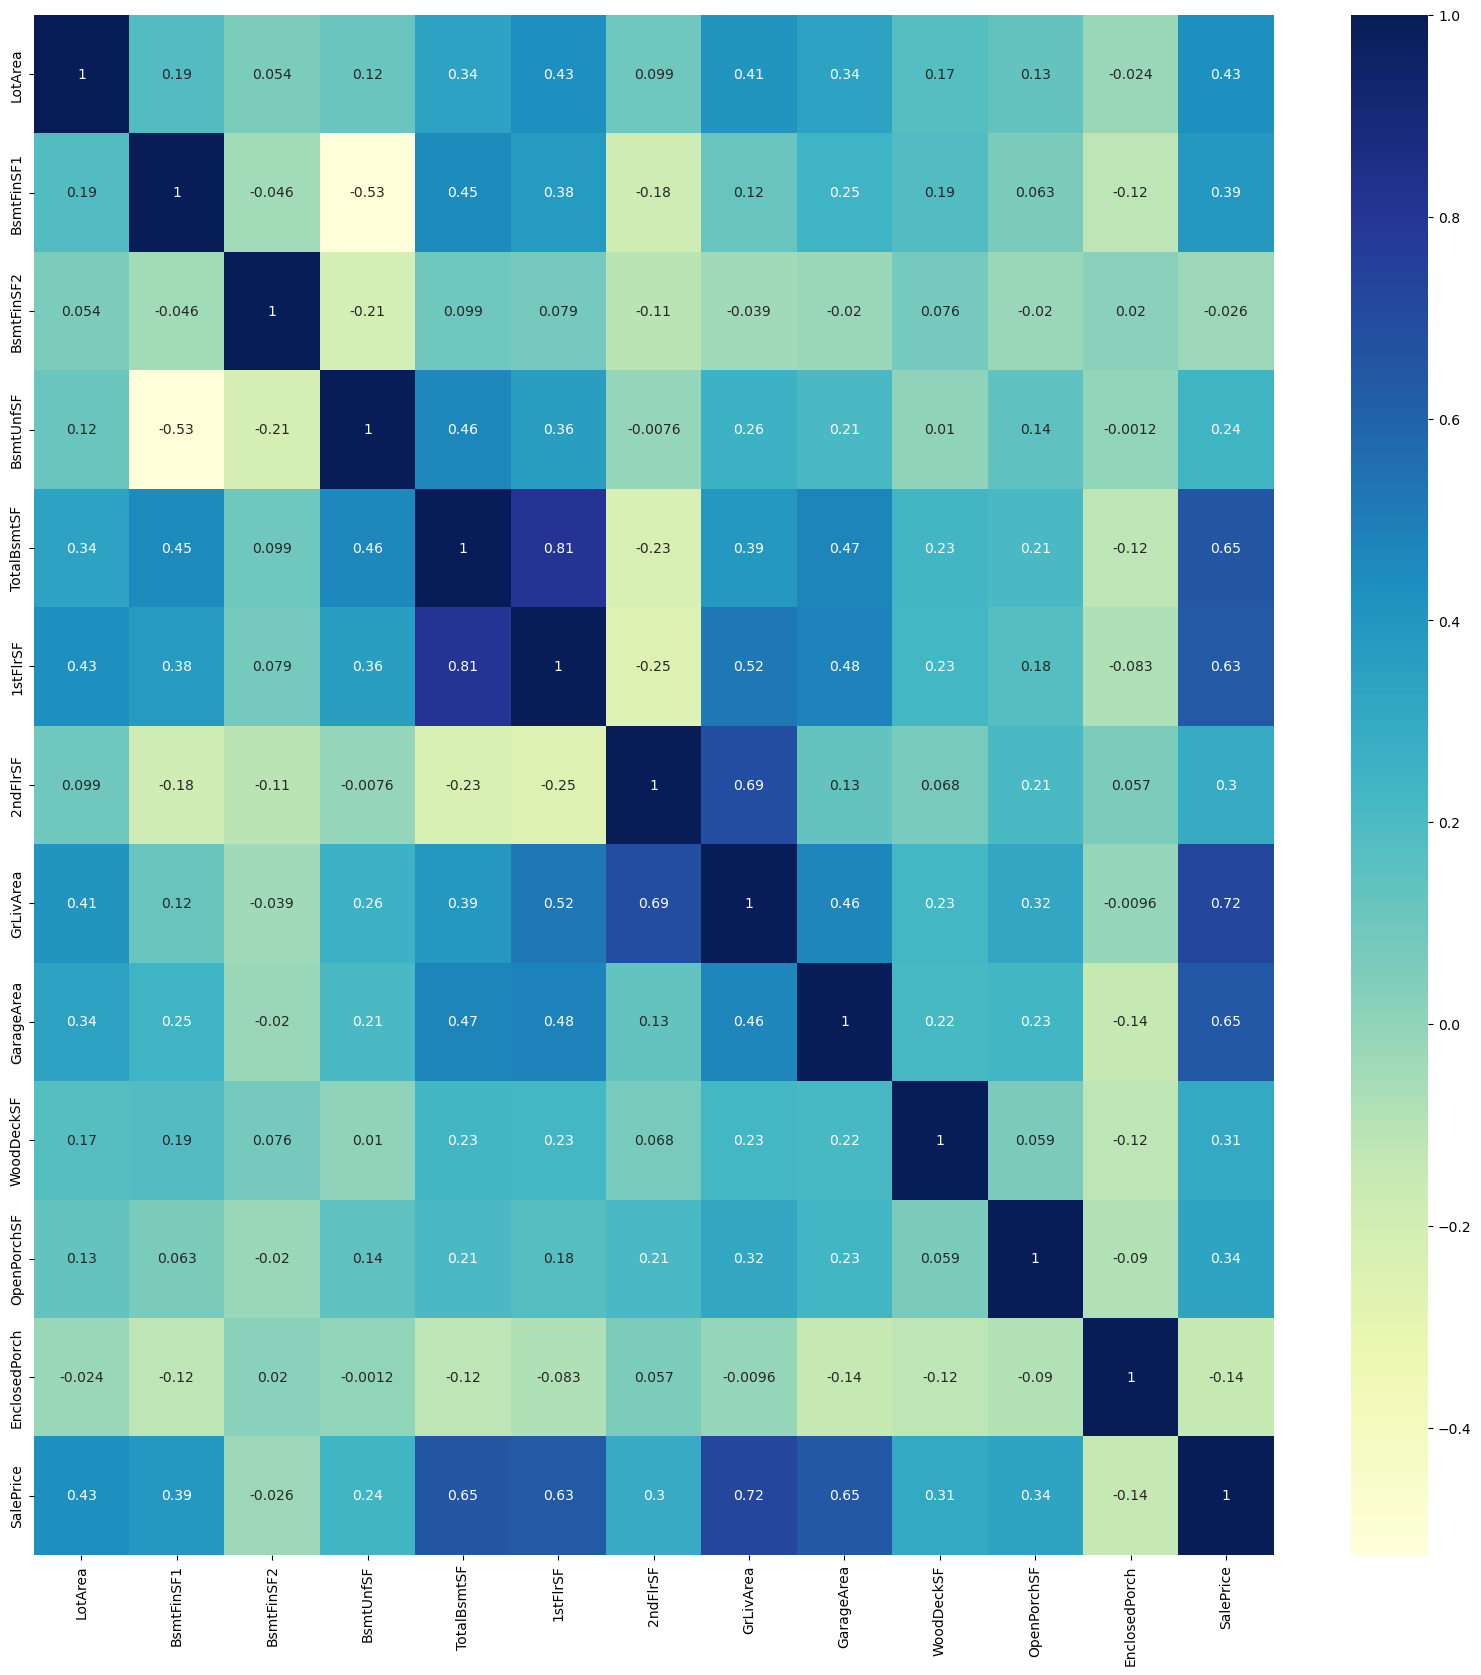

In [3327]:
#plot the correlation between the numeric values
plt.figure(figsize = (20,20))
sns.heatmap(numeric_vars_1.corr(),cmap="YlGnBu",annot=True)
plt.show()

##### insights from heatmap
  below variables have high correlation 
  1. 1stFlrSF and TotalBsmtSF - 82%
  2. GrLivArea and SalePrice - 72%
  3. GarageArea and SalePrice - 65%
  4. TotalBsmtSF and SalePrice - 65%
  5. 1stFlrSF and SalePrice - 61%

In [3328]:
houses['LotArea'].describe()

count     1387.000000
mean      9225.405191
std       3168.622150
min       1300.000000
25%       7411.000000
50%       9247.000000
75%      11208.500000
max      17400.000000
Name: LotArea, dtype: float64

In [3329]:
#plotting categorical varaibles
cat_variables  = houses.select_dtypes('object')
#cat_variables.drop(['SalePrice'],axis=1, inplace =True)
print(cat_variables.head())
print(len(cat_variables.columns))


  MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageType GarageFinish GarageCars  \
0       Gtl      CollgCr       Norm  ...     Attchd          RFn          2   
1       Gtl      Veenker      Feedr  ...     Attchd          RFn          2   
2       Gtl      CollgCr       Norm  ...     Attchd          RFn          2   
3       Gtl      Crawfor       Norm  ...     Detchd          Unf          3   
4       Gtl      NoRidge       Norm  ...     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive YrSold SaleType SaleCondition  \
0         TA      

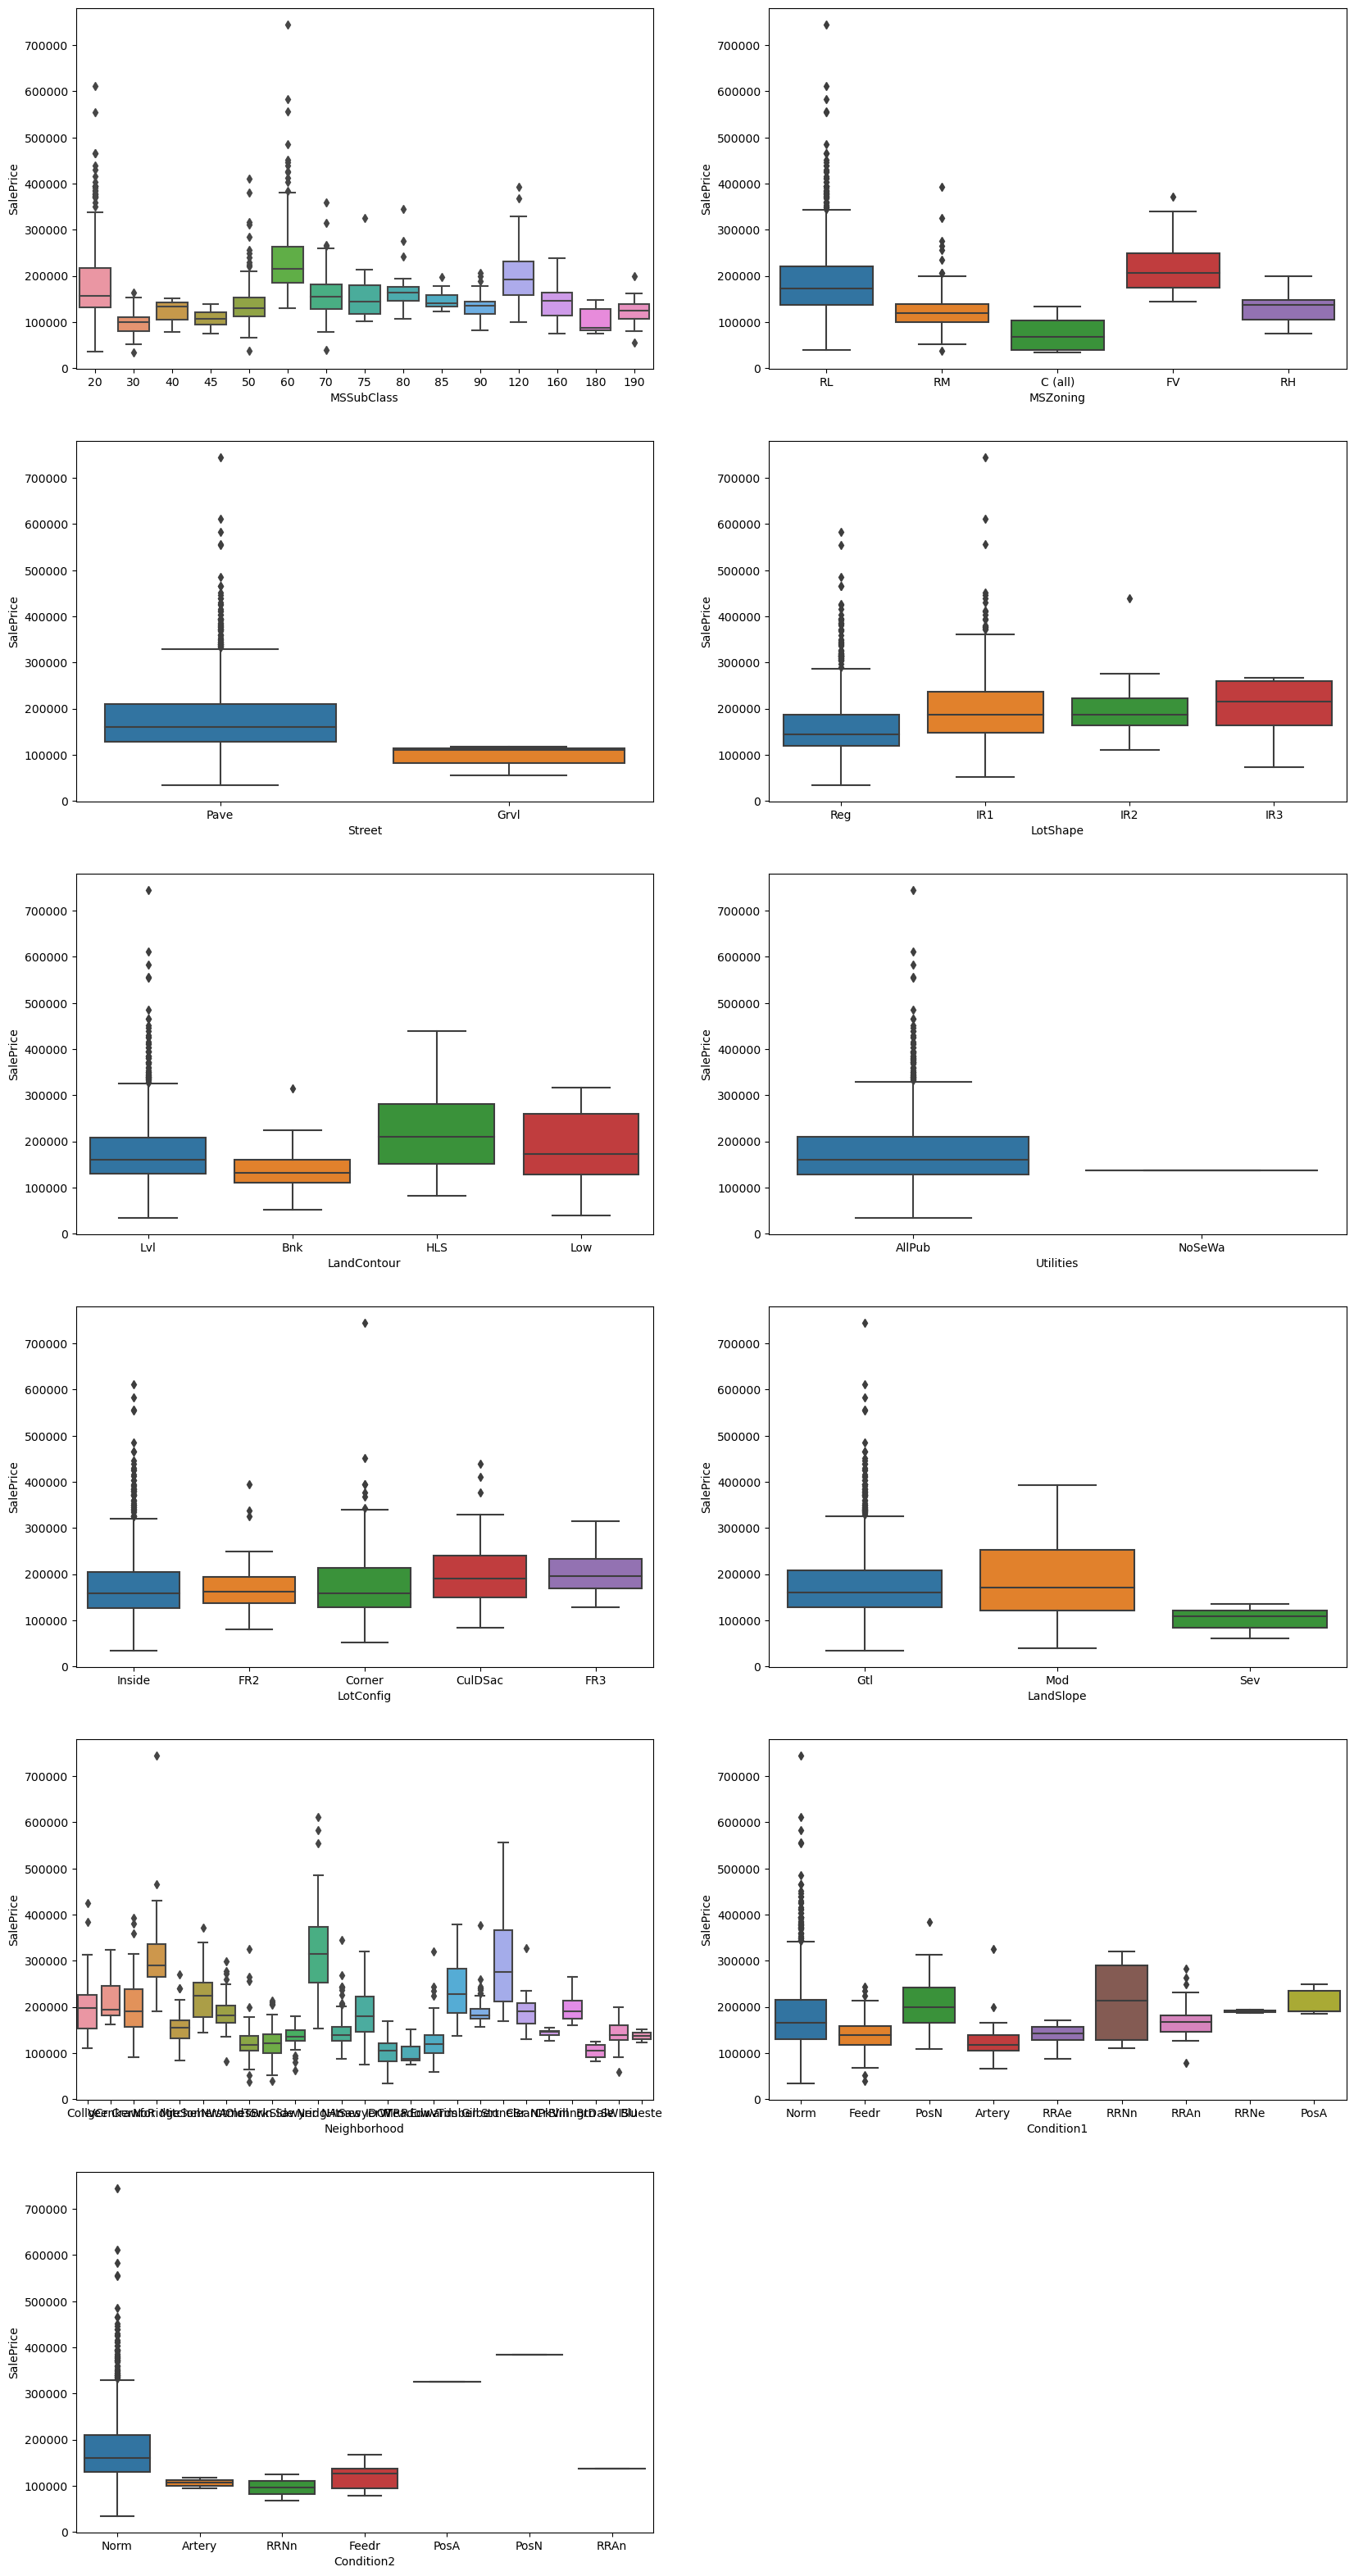

In [3330]:
#Bivariate Analysis
#Visualize all categorical variables using box plot
plt.figure(figsize=(20, 40))
for i in range(1, 12):
    plt.subplot(6,2,i)
    sns.boxplot(x = cat_variables.iloc[:,i-1], y = houses['SalePrice'])
plt.show()
#we could see Mssubclass,MsZoning,Utilities, Neighbourhoud, condition1, condition2 have difference in mean values
#which means these variables would be impacting the price


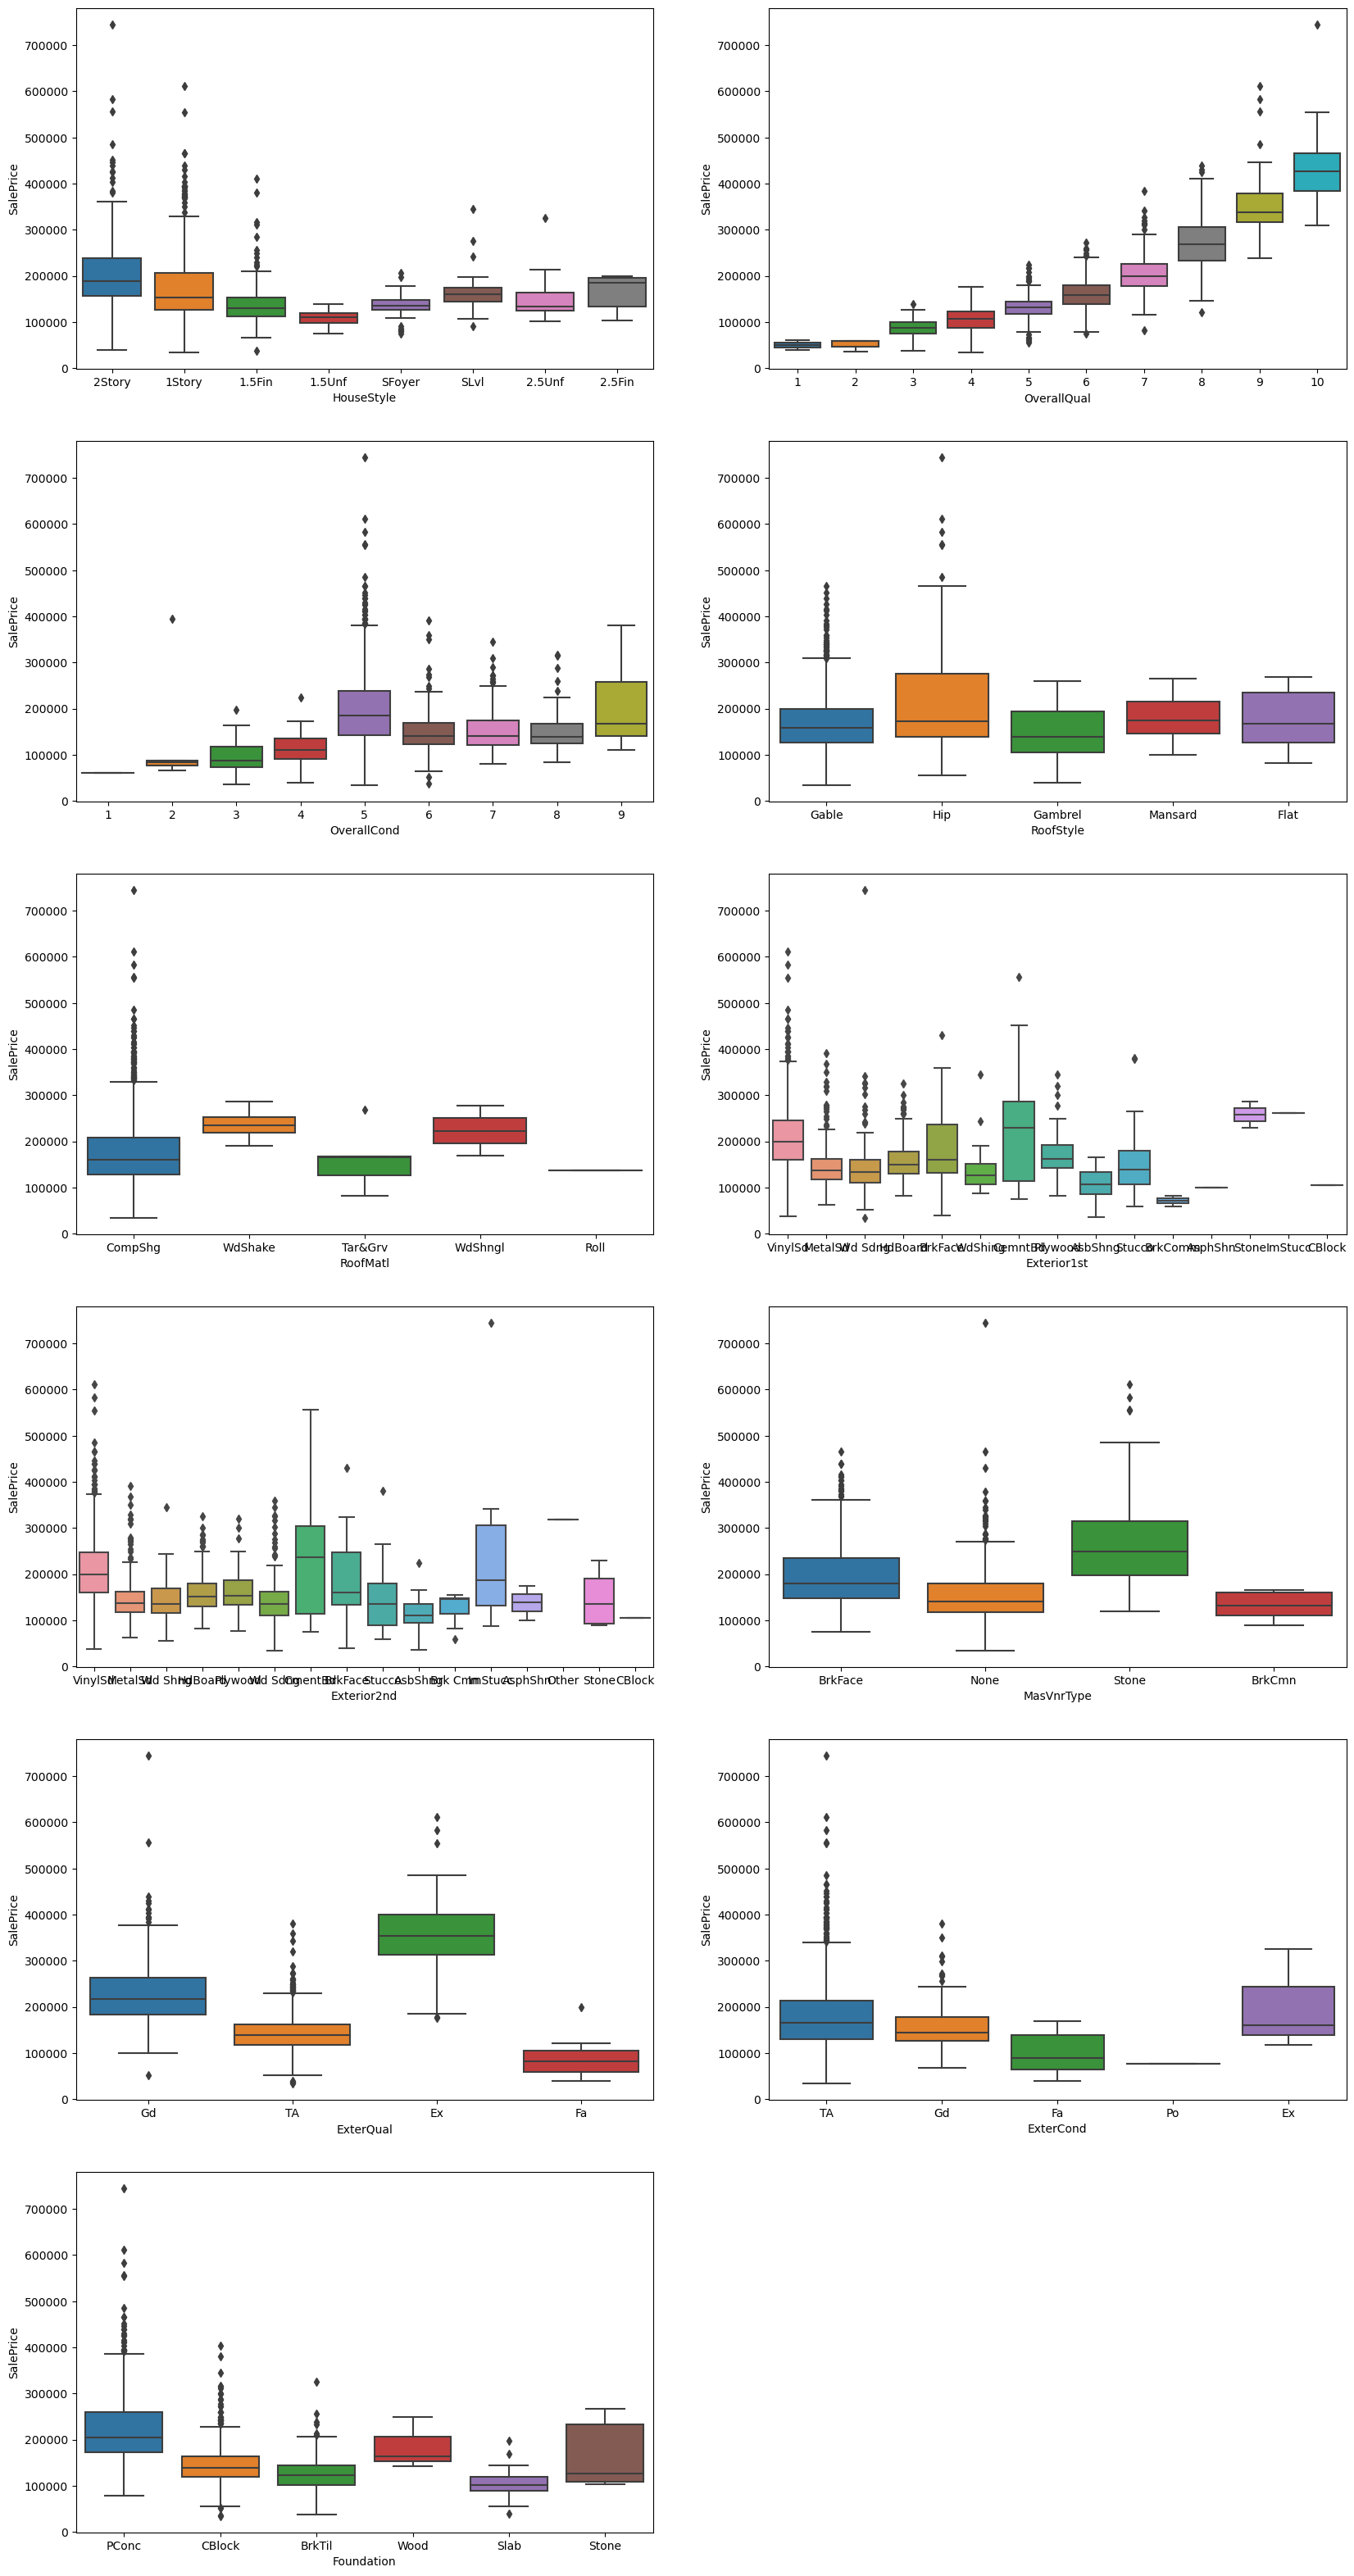

In [3331]:
plt.figure(figsize=(20, 40))
for i in range(13, 24):
    plt.subplot(6,2,i-12)
    sns.boxplot(x = cat_variables.iloc[:,i-1], y = houses['SalePrice'])
plt.show()
#we could see Housestyle,overallQual,RoofMatl, Exterior1st, Exterior2nd, MasVnrType,ExterQual have difference in mean values
#which means these variables would be impacting the price


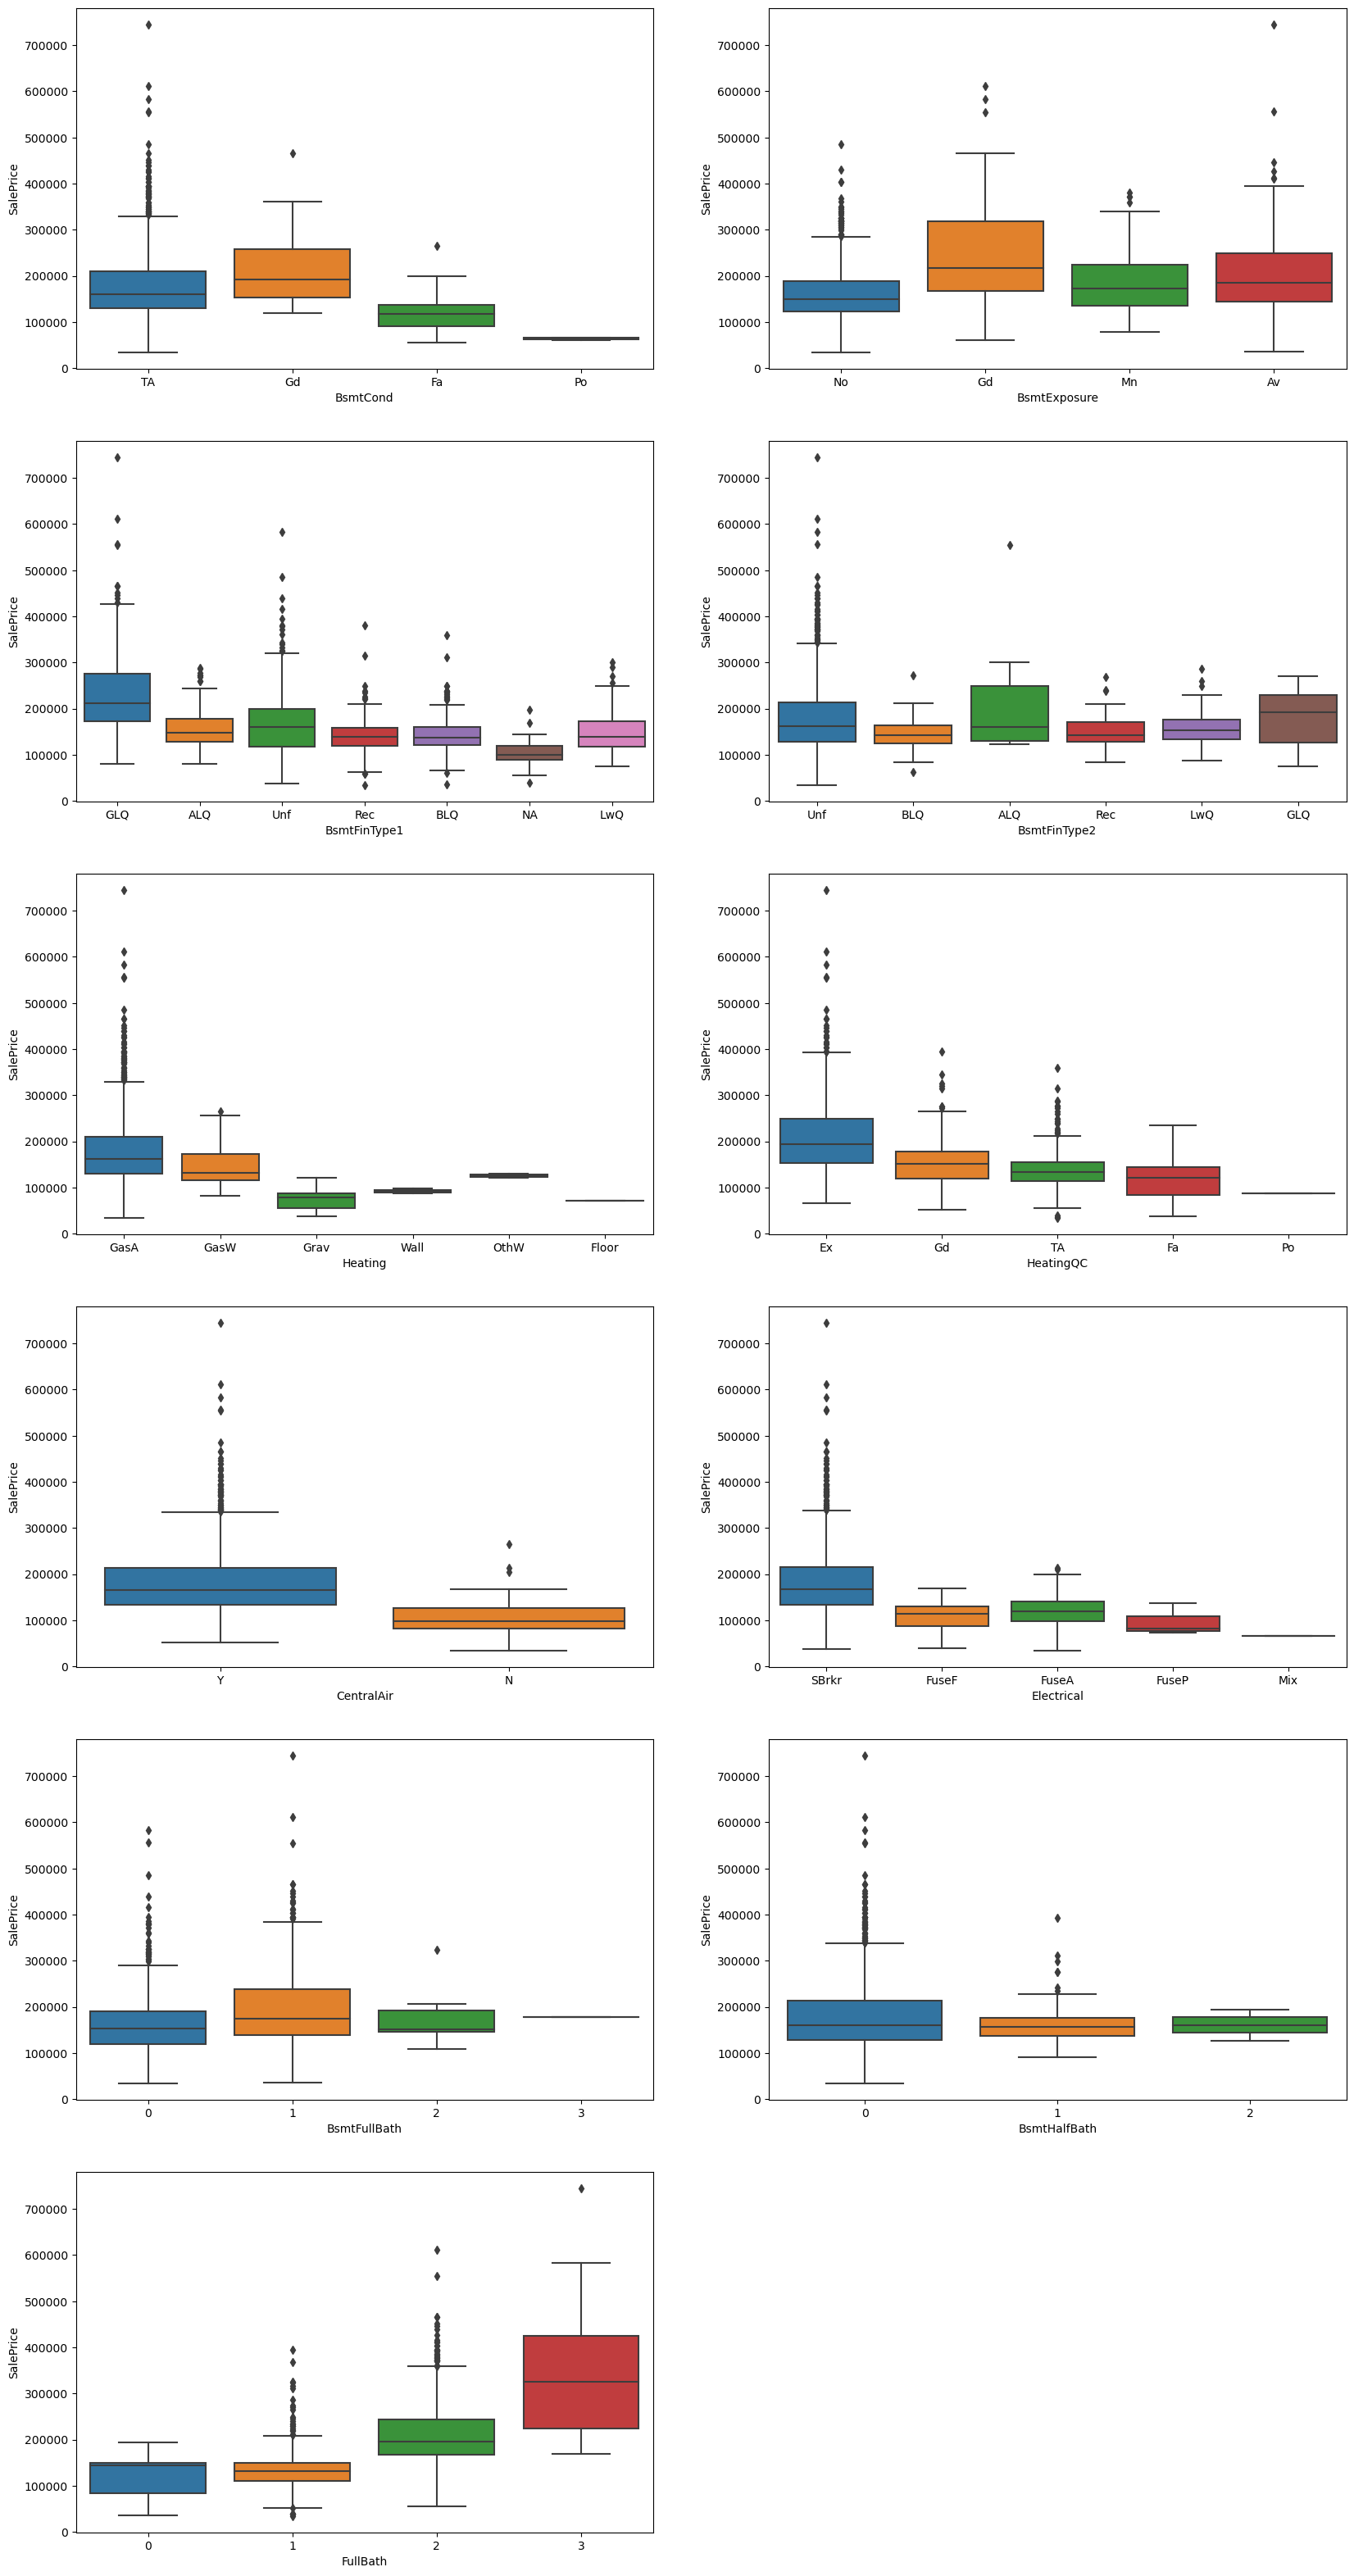

In [3332]:
plt.figure(figsize=(20, 40))
for i in range(25, 36):
    plt.subplot(6,2,i-24)
    sns.boxplot(x = cat_variables.iloc[:,i-1], y = houses['SalePrice'])
plt.show()
#we could see BsmtQual,BsmtCond have difference in mean values
#which means these variables would be impacting the price


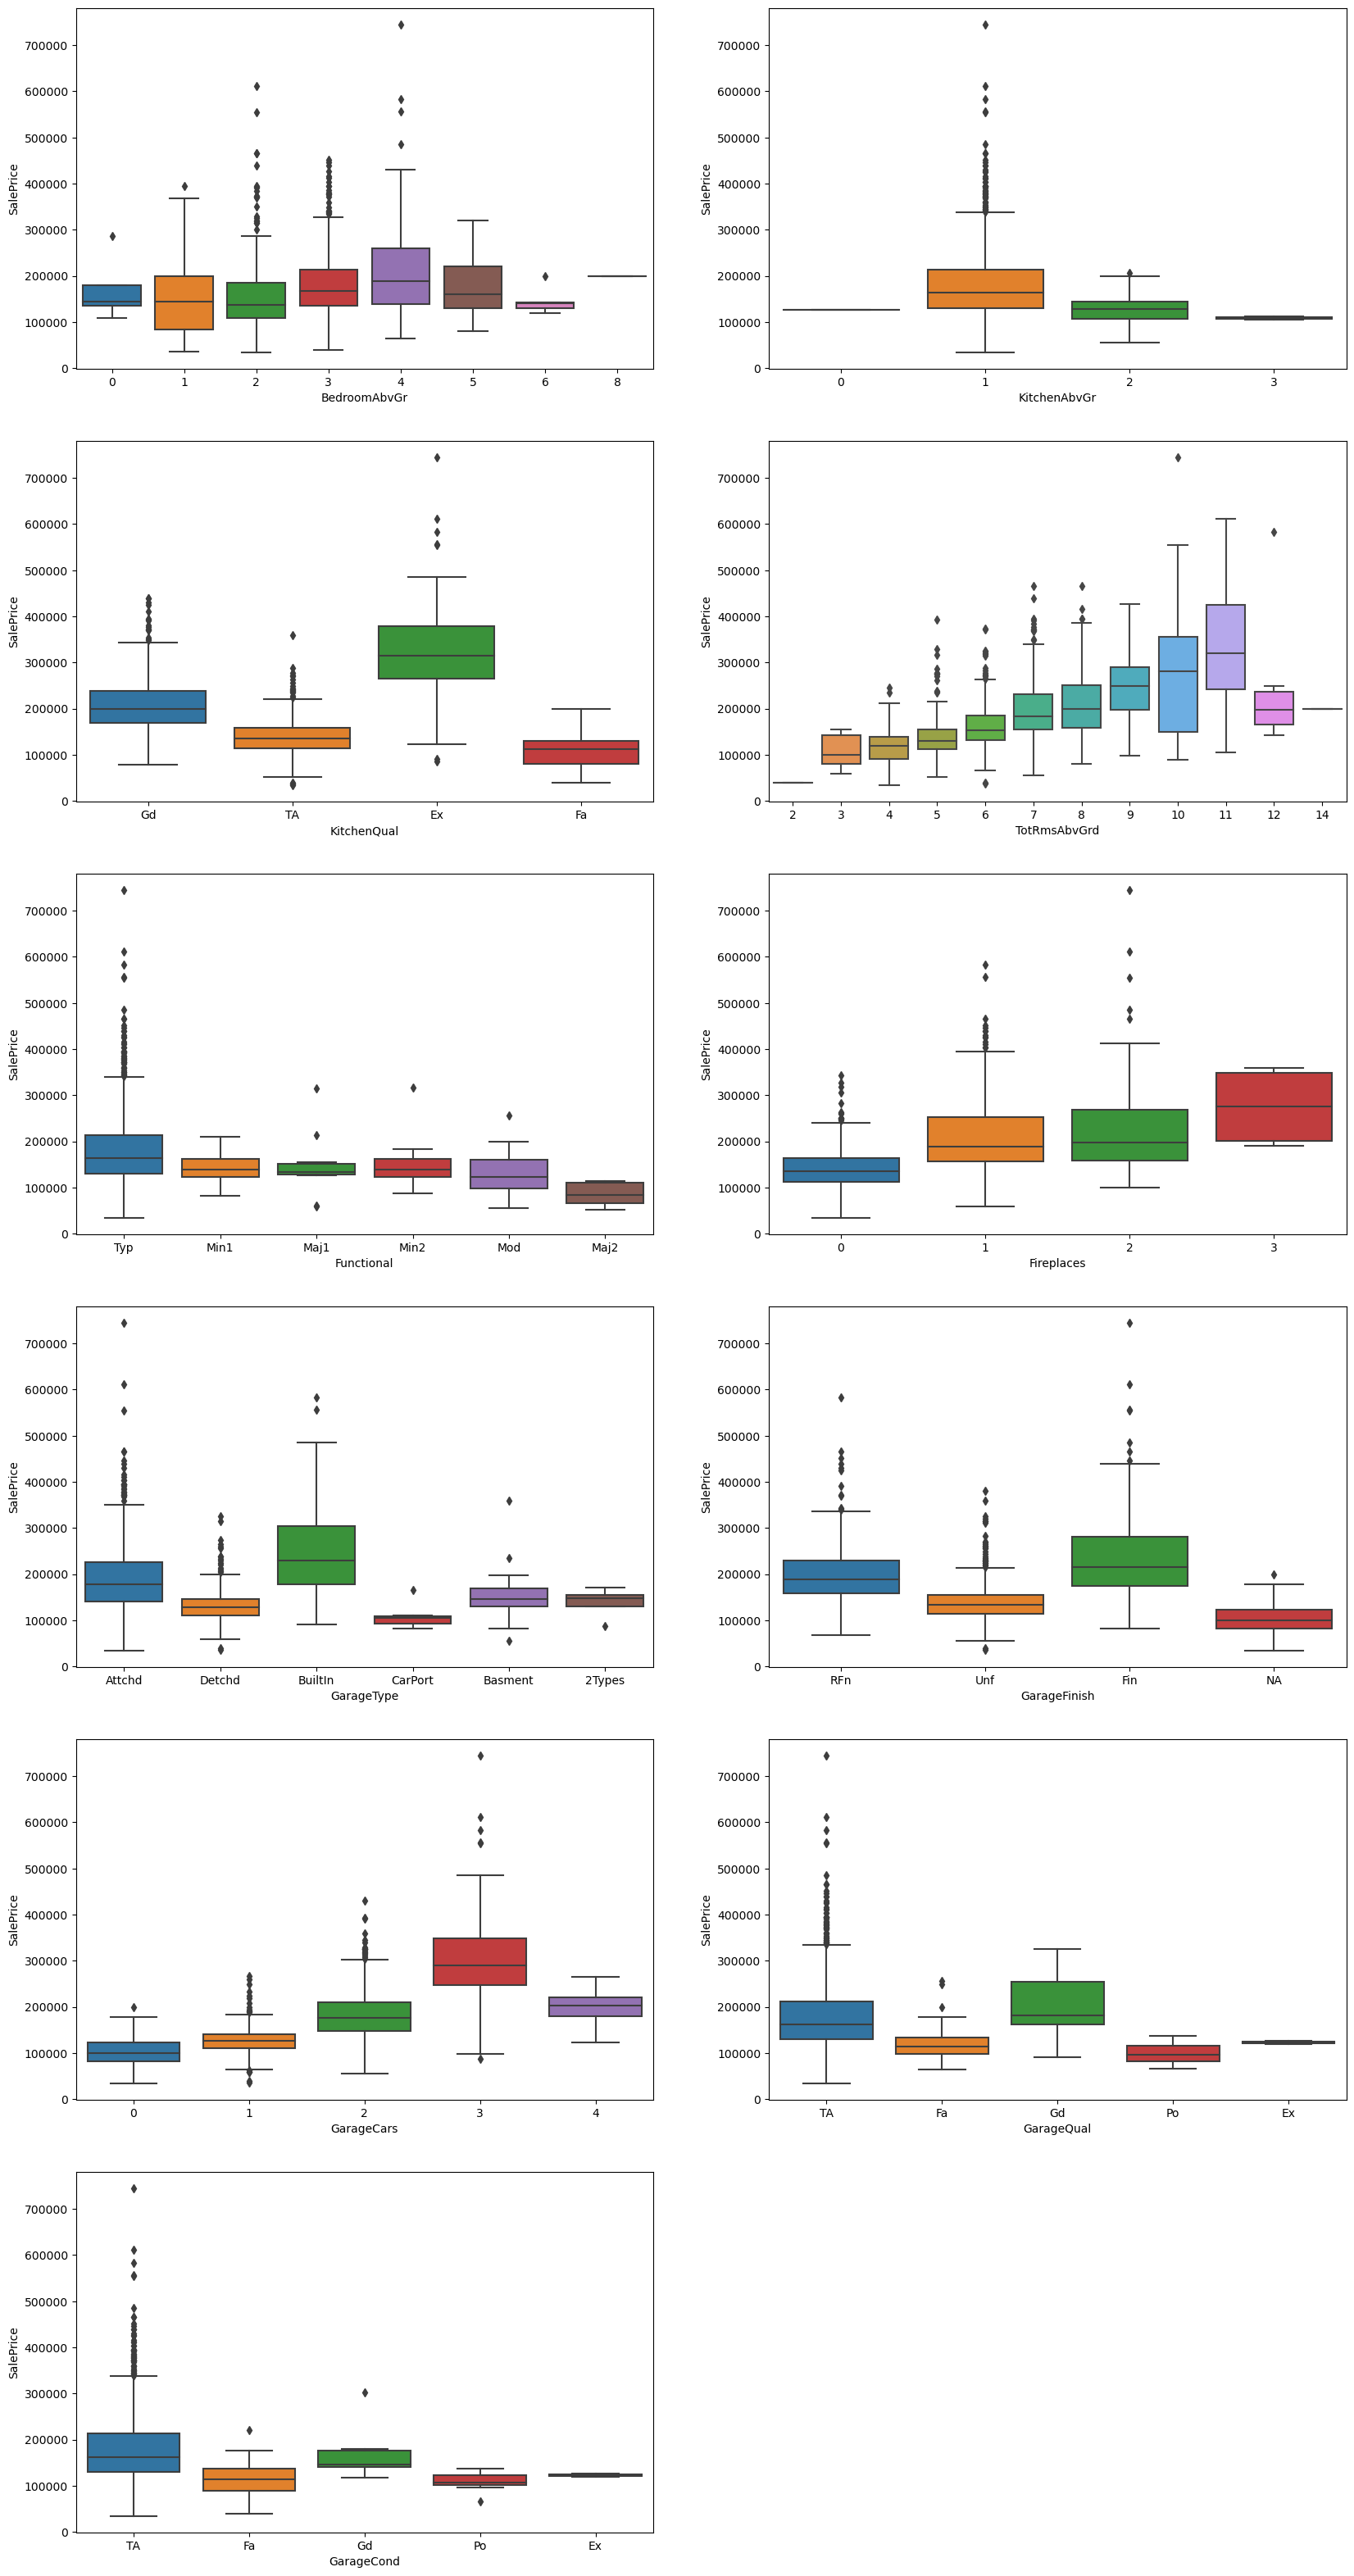

In [3333]:
plt.figure(figsize=(20, 40))
for i in range(37, 48):
    plt.subplot(6,2,i-36)
    sns.boxplot(x = cat_variables.iloc[:,i-1], y = houses['SalePrice'])
plt.show()
#we could see KitchenQual,GarageType,GarageCars,GarageQual have difference in mean values
#which means these variables would be impacting the price


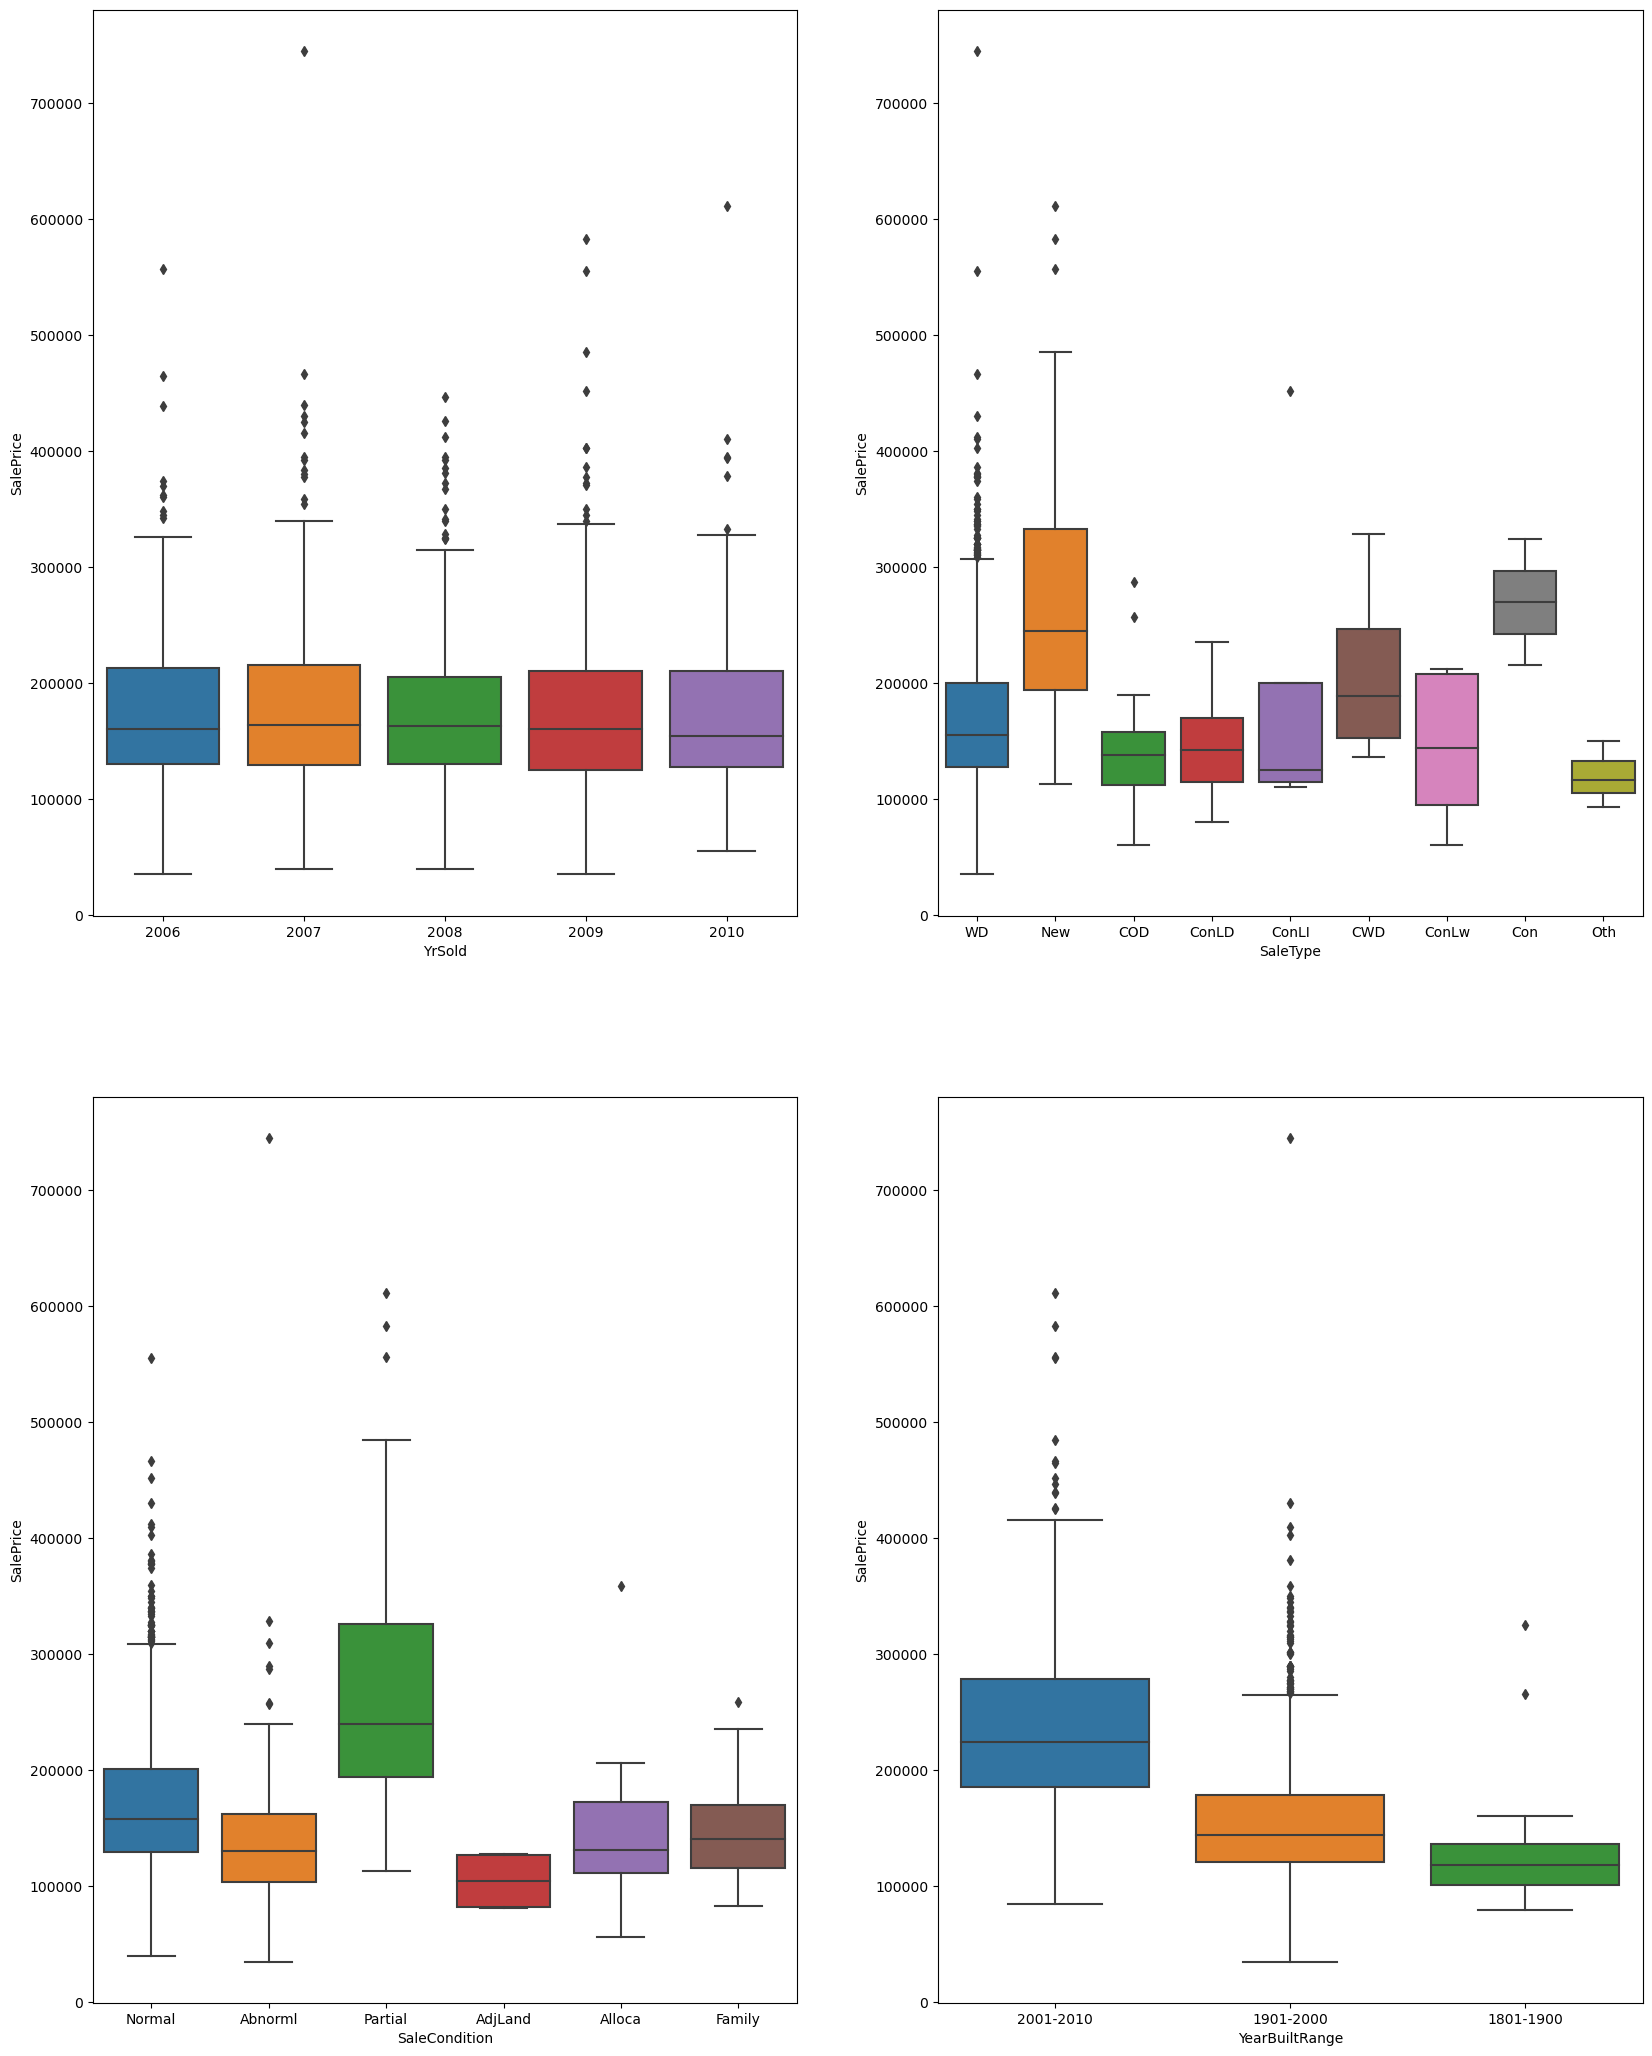

In [3334]:
plt.figure(figsize=(20, 40))
for i in range(49, 53):
    plt.subplot(3,2,i-48)
    sns.boxplot(x = cat_variables.iloc[:,i-1], y = houses['SalePrice'])
plt.show()
#we could see SaleType and salescondition have difference in mean values
#which means these variables would be impacting the price

In [3335]:
cat_variables.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,YrSold,SaleType,SaleCondition,YearBuiltRange
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,2,TA,TA,Y,2008,WD,Normal,2001-2010
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,2,TA,TA,Y,2007,WD,Normal,1901-2000
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,2,TA,TA,Y,2008,WD,Normal,2001-2010
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,3,TA,TA,Y,2006,WD,Abnorml,1901-2000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,3,TA,TA,Y,2008,WD,Normal,1901-2000


In [3336]:
cat_variables.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'YrSold', 'SaleType', 'SaleCondition', 'YearBuiltRange'],
      dtype='object')

In [3337]:
houses.select_dtypes('int64','float64').head()

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,8450,706,0,150,856,856,854,1710,548,0,61,0,208500
1,9600,978,0,284,1262,1262,0,1262,460,298,0,0,181500
2,11250,486,0,434,920,920,866,1786,608,0,42,0,223500
3,9550,216,0,540,756,961,756,1717,642,0,35,272,140000
4,14260,655,0,490,1145,1145,1053,2198,836,192,84,0,250000


In [3338]:
#create dummies
cat_variables = houses.select_dtypes(include=['object'])
print(cat_variables.head())

houses_dummies = pd.get_dummies(cat_variables, drop_first=True)
print(houses_dummies.head())
houses = houses.drop(list(cat_variables.columns), axis=1)
houses= pd.concat([houses, houses_dummies], axis=1)

print(houses.head())



  MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... GarageType GarageFinish GarageCars  \
0       Gtl      CollgCr       Norm  ...     Attchd          RFn          2   
1       Gtl      Veenker      Feedr  ...     Attchd          RFn          2   
2       Gtl      CollgCr       Norm  ...     Attchd          RFn          2   
3       Gtl      Crawfor       Norm  ...     Detchd          Unf          3   
4       Gtl      NoRidge       Norm  ...     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive YrSold SaleType SaleCondition  \
0         TA      

In [3339]:
print(houses.head())
print(houses.info())
print(houses.columns)

   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleType_New  \
0          856       856       854       1710  ...             0   
1         1262      1262         0       1262  ...             0   
2          920       920       866       1786  ...             0   
3          756       961       756       1717  ...             0   
4         1145      1145      1053       2198  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                  

In [3340]:
houses.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuiltRange_1901-2000,YearBuiltRange_2001-2010
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,68.893295,9225.405191,100.551550,428.285508,42.771449,568.545061,1039.602019,1142.886806,338.979813,1486.978371,...,0.082913,0.002163,0.868061,0.002884,0.007210,0.014420,0.822639,0.084355,0.728190,0.255948
std,19.094702,3168.622150,172.214599,422.719920,151.343966,442.874866,408.976437,361.997209,426.599401,486.222554,...,0.275850,0.046474,0.338547,0.053644,0.084634,0.119256,0.382112,0.278019,0.445053,0.436550
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7411.000000,0.000000,0.000000,0.000000,226.000000,790.500000,873.000000,0.000000,1121.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,70.000000,9247.000000,0.000000,378.000000,0.000000,479.000000,980.000000,1074.000000,0.000000,1440.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,78.000000,11208.500000,163.500000,697.000000,0.000000,802.000000,1267.500000,1360.000000,726.000000,1748.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,182.000000,17400.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,4476.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model building and evaluation

In [3341]:
#split into train and test 
X = houses.drop('SalePrice',axis=1)
y = houses['SalePrice']
print(X.head())
print(y.head())

   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleType_New  \
0          856       856       854       1710  ...             0   
1         1262      1262         0       1262  ...             0   
2          920       920       866       1786  ...             0   
3          756       961       756       1717  ...             0   
4         1145      1145      1053       2198  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                  

In [3342]:
from sklearn.preprocessing import scale

#storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'YearBuiltRange_1901-2000',
       'YearBuiltRange_2001-2010'],
      dtype='object', length=281)

In [3343]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuiltRange_1901-2000,YearBuiltRange_2001-2010
count,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,...,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03
mean,-2.100379e-16,1.447212e-16,7.684312e-18,7.043953e-18,2.337312e-17,-5.699198e-17,-2.510209e-16,-1.562477e-16,-3.457940e-17,-1.754585e-16,...,2.049150e-17,-5.122875e-18,1.050189e-16,2.561437e-18,-1.344755e-17,4.482515e-18,-4.354444e-17,3.714084e-17,1.261508e-16,1.600898e-17
std,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,...,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00
min,-2.509103e+00,-2.502117e+00,-5.840842e-01,-1.013532e+00,-2.827128e-01,-1.284223e+00,-2.542878e+00,-2.235317e+00,-7.948958e-01,-2.372153e+00,...,-3.006806e-01,-4.655781e-02,-2.565002e+00,-5.377977e-02,-8.521833e-02,-1.209569e-01,-2.153651e+00,-3.035226e-01,-1.636779e+00,-5.865085e-01
25%,-4.659147e-01,-5.728230e-01,-5.840842e-01,-1.013532e+00,-2.827128e-01,-7.737369e-01,-6.093062e-01,-7.458183e-01,-7.948958e-01,-7.529687e-01,...,-3.006806e-01,-4.655781e-02,3.898633e-01,-5.377977e-02,-8.521833e-02,-1.209569e-01,4.643278e-01,-3.035226e-01,-1.636779e+00,-5.865085e-01
50%,5.797966e-02,6.817663e-03,-5.840842e-01,-1.189999e-01,-2.827128e-01,-2.022634e-01,-1.457872e-01,-1.903651e-01,-7.948958e-01,-9.665392e-02,...,-3.006806e-01,-4.655781e-02,3.898633e-01,-5.377977e-02,-8.521833e-02,-1.209569e-01,4.643278e-01,-3.035226e-01,6.109561e-01,-5.865085e-01
75%,4.770951e-01,6.260797e-01,3.656551e-01,6.359090e-01,-2.827128e-01,5.273253e-01,5.574409e-01,5.999812e-01,9.075488e-01,5.370293e-01,...,-3.006806e-01,-4.655781e-02,3.898633e-01,-5.377977e-02,-8.521833e-02,-1.209569e-01,4.643278e-01,-3.035226e-01,6.109561e-01,1.705005e+00
max,5.925597e+00,2.580788e+00,8.710001e+00,4.164339e+00,9.460204e+00,3.992307e+00,5.299032e+00,5.762103e+00,4.047457e+00,6.149652e+00,...,3.325789e+00,2.147867e+01,3.898633e-01,1.859435e+01,1.173456e+01,8.267406e+00,4.643278e-01,3.294647e+00,6.109561e-01,1.705005e+00


In [3344]:
#split into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size = 0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 281)
(417, 281)
(970,)
(417,)


#### Linear Regresssion

In [3345]:
#instanctiate the variables
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [3346]:
print(lm.intercept_)
print(lm.coef_)

-12015953388456.19
[ 1.54371030e+02  6.73015276e+03  8.49493395e+02  1.75557524e+15
  6.28538440e+14  1.83927965e+15 -1.69849792e+15  8.76909177e+03
  8.63830489e+03  9.75160156e+03  4.87168750e+03  9.70218750e+02
  1.20287500e+03 -2.87738281e+02 -6.74906250e+02  7.34843750e+01
  2.88382812e+02 -4.76828125e+03 -5.23056250e+03 -3.52754883e+03
  1.18189062e+03 -3.35313281e+03 -1.44621094e+03  1.06282997e+14
 -1.11576562e+03 -4.79193750e+03 -1.65131250e+03 -1.98218750e+03
  7.57150000e+03  2.63813281e+03  8.99821875e+03  6.32162500e+03
 -7.52187500e+02 -5.34921875e+02 -1.07121875e+03  2.79312500e+02
  1.70906250e+02 -1.80023438e+03 -1.46815625e+03 -1.22556250e+03
  3.49750000e+02 -9.77953125e+02  7.24250000e+02 -8.34375000e+02
  6.35703125e+02 -8.88968750e+02  4.61265625e+02 -2.83375000e+02
 -1.93206250e+03 -1.27631250e+03 -3.50720312e+03  5.61234375e+02
 -6.65206250e+03 -3.20103125e+03 -3.35218750e+03 -2.47734375e+03
 -3.67259375e+03 -7.47518750e+03  3.70000000e+02 -3.89790625e+03
  1.61

In [3347]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metrics=[]
r2_train_lm = r2_score(y_train,y_pred_train)
print(r2_train_lm)
metrics.append(r2_train_lm)

r2_test_lm = r2_score(y_test,y_pred_test)
print(r2_test_lm)
metrics.append(r2_test_lm)

rss_train_lm = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lm)
metrics.append(r2_test_lm)

rss_test_lm = np.sum(np.square(y_test  - y_pred_test))
print(rss_test_lm)
metrics.append(rss_train_lm)

mse_train_lm = mean_squared_error(y_train,y_pred_train)
print(mse_train_lm)
metrics.append(mse_train_lm ** 0.5)

mse_test_lm = mean_squared_error(y_test, y_pred_test)
print(mse_test_lm)
metrics.append(mse_test_lm ** 0.5)

0.9533736576390727
-1.1452049725877605e+20
244274151611.39224
2.9863512608139913e+32
251829022.2797858
7.161513814901658e+29


### Ridge and Lasso Regression

In [3348]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge,
                                 param_grid = lambdas,
                                 scoring = 'neg_mean_absolute_error',
                                 cv = folds,
                                 return_train_score = True,
                                 verbose = 1)
model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3349]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 500}


In [3350]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.89605423e+03  4.10370490e+03  2.71778262e+03  5.06709907e+03
  9.31348348e+02  4.73826603e+02  6.09512758e+03  6.41393602e+03
  2.58300254e+03  6.96465468e+03  3.98370898e+03  1.19821214e+03
  1.60772809e+03 -2.07133579e+02 -8.67222395e+02  1.19897398e+02
 -3.66809909e+01  3.39063155e+02  1.65361055e+03  3.79020049e+02
 -7.79739705e+00 -2.46400681e+02 -6.09719009e+01 -1.00496589e+03
 -8.03722984e+02 -1.02566706e+03 -7.26782589e+02 -5.89464876e+02
  1.06521787e+03  1.19471093e+02  9.22501781e+02 -9.64340403e+02
 -5.38453551e+01 -2.64089386e+01 -5.79458141e+02 -4.23743412e+02
  8.83114566e+02 -4.65082076e+02 -3.13034869e+02 -6.76286618e+02
  6.13788781e+02 -5.34774094e+02  1.79547028e+02 -9.53664049e+01
  4.84293175e+02 -7.57569673e+02  4.02617163e+02  1.71877159e+02
  8.15793926e+02  1.29494984e+02 -5.01741910e+02  2.64990344e+03
 -1.91468509e+03 -1.08302282e+03 -7.79332200e+02 -1.21774836e+03
 -9.86426806e+02 -1.54678688e+03  3.97823897e+02 -6.24581936e+02
  2.64449430e+03  4.30865

In [3351]:
#calculate metrics for ridge 
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metrics=[]
r2_train_rg = r2_score(y_train,y_pred_train)
print(r2_train_rg)
metrics.append(r2_train_rg)

r2_test_rg = r2_score(y_test,y_pred_test)
print(r2_test_rg)
metrics.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train - y_pred_train))
print(rss_train_rg)
metrics.append(r2_test_rg)

rss_test_rg = np.sum(np.square(y_test  - y_pred_test))
print(rss_train_rg)
metrics.append(rss_train_rg)

mse_train_rg = mean_squared_error(y_train,y_pred_train)
print(mse_train_rg)
metrics.append(mse_train_rg ** 0.5)

mse_test_rg = mean_squared_error(y_test, y_pred_test)
print(mse_test_rg)
metrics.append(mse_test_rg ** 0.5)

0.9332834147717218
0.8862030938423715
349526392803.73254
349526392803.73254
360336487.4265284
711626420.6392727


#### Lasso

In [3352]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

lasso = Lasso()
folds=5
model_cv_lasso = GridSearchCV(estimator = lasso,
                                 param_grid = lambdas,
                                 scoring = 'neg_mean_absolute_error',
                                 cv = folds,
                                 return_train_score = True,
                                 verbose = 1)
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3353]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 500}


In [3354]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha =500
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 3.46657677e+02  5.23424860e+03  1.23993846e+03  7.45953239e+03
  8.17653129e+02 -0.00000000e+00  9.76247364e+03  2.64425430e+03
  0.00000000e+00  2.04853091e+04  4.93166050e+03  4.10779377e+02
  5.61430854e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  2.96375155e+03 -0.00000000e+00
  0.00000000e+00  3.14577332e+02  0.00000000e+00 -2.37681455e+01
 -5.93357038e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.47688234e+03  0.00000000e+00  0.00000000e+00 -5.51121525e+02
 -0.00000000e+00  0.00000000e+00 -2.67014571e+02 -0.00000000e+00
  2.92489340e+02 -2.67054477e+02 -0.00000000e+00 -1.84376166e+02
  3.39240486e+01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -4.35601595e+02  1.26779942e+02  0.00000000e+00
  1.26812015e+03  1.02764004e+01  0.00000000e+00  3.62875737e+03
 -1.27336799e+03 -0.00000000e+00 -7.44858697e+02 -8.70058843e+02
 -2.98407811e+02 -6.62540997e+02  5.05440333e+02 -0.00000000e+00
  2.15302288e+03  4.33200

In [3355]:
#calculate metrics for lasso 
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metrics3=[]
r2_train_lsm = r2_score(y_train,y_pred_train)
print(r2_train_lsm)
metrics3.append(r2_train_lsm)

r2_test_lsm = r2_score(y_test,y_pred_test)
print(r2_test_lsm)
metrics3.append(r2_test_lsm)

rss_train_lsm= np.sum(np.square(y_train - y_pred_train))
print(rss_train_lsm)
metrics3.append(r2_test_lsm)

rss_test_lsm = np.sum(np.square(y_test  - y_pred_test))
print(rss_train_lsm)
metrics3.append(rss_train_lsm)

mse_train_lsm= mean_squared_error(y_train,y_pred_train)
print(mse_train_lsm)
metrics3.append(mse_train_lsm ** 0.5)

mse_test_lsm = mean_squared_error(y_test, y_pred_test)
print(mse_test_lsm)
metrics3.append(mse_test_lsm ** 0.5)

0.9402480478465264
0.9040112702417722
313038867737.6836
313038867737.6836
322720482.2037975
600263385.7632246


In [3356]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics2, name = 'Ridge Regression')
ls_metric = pd.Series(metrics3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.332834e-01,9.332830e-01,9.402480e-01
1,R2 Score (Test),8.862031e-01,8.862030e-01,9.040113e-01
2,RSS (Train),8.862031e-01,8.862030e-01,9.040113e-01
3,RSS (Test),3.495264e+11,3.495264e+11,3.130389e+11
4,MSE (Train),1.898253e+04,1.898253e+04,1.796442e+04
5,MSE (Test),2.667633e+04,2.667633e+04,2.450027e+04


In [3357]:
lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS (Train)',
  'RSS (Test)',
  'MSE (Train)',
  'MSE (Test)'],
 'Linear Regression': [0.9332834147717218,
  0.8862030938423715,
  0.8862030938423715,
  349526392803.73254,
  18982.531112223376,
  26676.326970542115]}

In [3358]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [3359]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [3360]:
print(betas[betas['Lasso'] > 0 ].sort_values(by='Lasso',ascending=False))
print(len(betas[betas['Lasso'] > 0 ]))

                                Linear        Ridge         Lasso
GrLivArea                 9.751602e+03  6964.654676  20485.309132
TotalBsmtSF              -1.698498e+15  6095.127578   9762.473642
OverallQual_9            -1.369992e+14  5149.517877   9744.089404
OverallQual_8            -2.636263e+14  3975.134738   7925.736399
BsmtFinSF1                1.755575e+15  5067.099075   7459.532391
OverallQual_10           -7.888043e+13  4176.500227   7086.040605
SaleCondition_Partial     8.817938e+03  2606.417507   6953.419706
LotArea                   6.730153e+03  4103.704899   5234.248595
GarageArea                4.871688e+03  3983.708982   4931.660497
Neighborhood_NridgHt      1.853875e+03  4308.654129   4332.002711
BsmtExposure_Gd           4.347844e+03  3626.034904   4331.403050
Neighborhood_StoneBr      3.211125e+03  3541.563673   3913.525110
Neighborhood_Crawfor      5.612344e+02  2649.903439   3628.757371
HalfBath_1                3.825188e+03  3173.863531   3337.174631
TotRmsAbvG


#### double the value of ridge and lasso

In [3361]:
#Fitting Ridge model for alpha = 1000, double of 500 and printing coefficients which have been penalised
alpha = 1000
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)

[ 2.00421291e+03  3.59269750e+03  2.75039579e+03  4.18787888e+03
  6.65837738e+02  5.65801893e+02  5.18770666e+03  5.48206231e+03
  2.20532405e+03  5.95580268e+03  3.81212631e+03  1.36770746e+03
  1.58713300e+03 -1.78307549e+02 -9.10833131e+02  7.11950699e+01
 -2.36465514e+01  2.52551160e+02  1.57187266e+03  4.41773773e+02
  2.39195168e+01 -2.68021400e+02 -8.27751285e+01 -8.90085570e+02
 -5.67242936e+02 -8.99145106e+02 -6.69945317e+02 -4.95300431e+02
  6.94893139e+02 -7.21638530e+01  9.46373747e+02 -1.01306807e+03
  6.92455259e+01  2.80957241e+01 -3.69816487e+02 -6.35030097e+02
  8.80679812e+02 -1.97750509e+02 -3.53852732e+02 -5.60278667e+02
  5.49615193e+02 -4.09974502e+02  8.93598786e+01 -9.75401249e+01
  5.33480411e+02 -6.44146377e+02  2.65014527e+02 -5.74551924e+01
  5.42255932e+02  1.03827847e+02 -5.32304127e+02  2.20757126e+03
 -1.64680608e+03 -9.46809185e+02 -6.79050035e+02 -9.95900318e+02
 -8.22783756e+02 -1.21610877e+03  2.03067530e+02 -4.03248118e+02
  2.32748776e+03  3.78034

In [3362]:
#calculate metrics for ridge 
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metrics4=[]
r2_train_rm = r2_score(y_train,y_pred_train)
print(r2_train_rm)
metrics4.append(r2_train_rm)

r2_test_rm = r2_score(y_test,y_pred_test)
print(r2_test_rm)
metrics4.append(r2_test_rm)

rss_train_rm= np.sum(np.square(y_train - y_pred_train))
print(rss_train_rm)
metrics4.append(r2_test_rm)

rss_test_rm = np.sum(np.square(y_test  - y_pred_test))
print(rss_train_rm)
metrics4.append(rss_train_rm)

mse_train_rm = mean_squared_error(y_train,y_pred_train)
print(mse_train_rm)
metrics4.append(mse_train_rm ** 0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metrics4.append(mse_test_rm ** 0.5)

0.9158971810486345
0.8725125802567931
440612402929.7063
440612402929.7063
454239590.6491817
797239742.728393


In [3363]:
#Fitting Ridge model for alpha = 1000, double of 500 and printing coefficients which have been penalised
alpha =1000
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)
print(lasso2.coef_)

[ 0.00000000e+00  5.09468772e+03  1.14501604e+03  7.22534473e+03
  1.49825391e+02 -0.00000000e+00  8.22252505e+03  4.12010682e+03
  0.00000000e+00  2.01906552e+04  5.87567874e+03  1.60386406e+02
  1.35046116e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.11863107e+03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.49293070e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  8.83727547e+02 -0.00000000e+00  0.00000000e+00 -9.91256136e+02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.69766078e+02  0.00000000e+00  0.00000000e+00
  7.66875374e+02  0.00000000e+00  0.00000000e+00  3.49697026e+03
 -6.40008607e+02 -0.00000000e+00 -2.20441564e+02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.38901684e+03  3.67884

In [3364]:
#calculate metrics for lasso 
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metrics5=[]
r2_train_lsm = r2_score(y_train,y_pred_train)
print(r2_train_lsm)
metrics5.append(r2_train_lsm)

r2_test_lsm = r2_score(y_test,y_pred_test)
print(r2_test_lsm)
metrics5.append(r2_test_lsm)

rss_train_lsm= np.sum(np.square(y_train - y_pred_train))
print(rss_train_lsm)
metrics5.append(r2_test_lsm)

rss_test_lsm = np.sum(np.square(y_test  - y_pred_test))
print(rss_train_lsm)
metrics5.append(rss_train_lsm)

mse_train_lsm= mean_squared_error(y_train,y_pred_train)
print(mse_train_lsm)
metrics5.append(mse_train_lsm ** 0.5)

mse_test_lsm = mean_squared_error(y_test, y_pred_test)
print(mse_test_lsm)
metrics5.append(mse_test_lsm ** 0.5)

0.9298192593922021
0.9015747800574739
367675009519.835
367675009519.835
379046401.56684023
615499922.9180505


In [3365]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics2, name = 'Ridge Regression_500')
ls_metric = pd.Series(metrics3, name = 'Lasso Regression_500')
rg2_metric = pd.Series(metrics4, name = 'Ridge Regression_1000')
ls2_metric = pd.Series(metrics5, name = 'Lasso Regression_1000')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg2_metric,ls2_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression_500,Lasso Regression_500,Ridge Regression_1000,Lasso Regression_1000
0,R2 Score (Train),9.332834e-01,9.332830e-01,9.402480e-01,9.158972e-01,9.298193e-01
1,R2 Score (Test),8.862031e-01,8.862030e-01,9.040113e-01,8.725126e-01,9.015748e-01
2,RSS (Train),8.862031e-01,8.862030e-01,9.040113e-01,8.725126e-01,9.015748e-01
3,RSS (Test),3.495264e+11,3.495264e+11,3.130389e+11,4.406124e+11,3.676750e+11
4,MSE (Train),1.898253e+04,1.898253e+04,1.796442e+04,2.131290e+04,1.946911e+04
5,MSE (Test),2.667633e+04,2.667633e+04,2.450027e+04,2.823543e+04,2.480927e+04


In [3366]:
betas2 = pd.DataFrame(index=X.columns)
betas2.rows = X.columns
betas2['Linear'] = lm.coef_
betas2['Ridge'] = ridge2.coef_
betas2['Lasso'] = lasso2.coef_

In [3367]:
print(betas2[betas2['Lasso'] > 0 ].sort_values(by='Lasso',ascending=False))
print(len(betas2[betas['Lasso'] > 0 ]))

                                Linear        Ridge         Lasso
GrLivArea                 9.751602e+03  5955.802685  20190.655174
OverallQual_9            -1.369992e+14  4436.336527  10168.090837
TotalBsmtSF              -1.698498e+15  5187.706661   8222.525052
OverallQual_8            -2.636263e+14  3433.754000   7776.030021
OverallQual_10           -7.888043e+13  3540.781126   7258.509728
BsmtFinSF1                1.755575e+15  4187.878882   7225.344726
SaleCondition_Partial     8.817938e+03  2254.125703   6115.847895
GarageArea                4.871688e+03  3812.126307   5875.678742
LotArea                   6.730153e+03  3592.697496   5094.687722
1stFlrSF                  8.769092e+03  5482.062314   4120.106817
BsmtExposure_Gd           4.347844e+03  3155.610624   4118.495764
Neighborhood_NridgHt      1.853875e+03  3780.343191   3678.840924
Neighborhood_Crawfor      5.612344e+02  2207.571259   3496.970265
Neighborhood_StoneBr      3.211125e+03  2937.535848   3328.410412
HalfBath_1

### Removing 5 important predictor variables and then building model again
#### GrLivArea, TotalBsmtSF ,OverallQual,BsmtFinSF1,SaleCondition

In [3368]:
columns_to_drop = X.columns[X.columns.str.contains('OverallQual')]

In [3369]:
columns_to_drop=columns_to_drop.append(X.columns[X.columns.str.contains('SaleCondition')])

In [3370]:
X_new = X.drop(columns_to_drop,axis=1)
X_new.drop(['GrLivArea','TotalBsmtSF','BsmtFinSF1'],axis=1,inplace=True)
print(X_new.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'YearBuiltRange_1901-2000', 'YearBuiltRange_2001-2010'],
      dtype='object', length=264)


In [3371]:
print(X.info())
print(X_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 281 entries, LotFrontage to YearBuiltRange_2001-2010
dtypes: float64(281)
memory usage: 3.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 264 entries, LotFrontage to YearBuiltRange_2001-2010
dtypes: float64(264)
memory usage: 2.8 MB
None


In [3372]:
#Creating train and test data
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y,train_size=0.7,test_size = 0.3,random_state=100)
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(970, 264)
(417, 264)
(970,)
(417,)


In [3373]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000 ]}

ridge_new = Ridge()

folds = 5
model_cv_ridge_new = GridSearchCV(estimator = ridge_new,
                                 param_grid = lambdas,
                                 scoring = 'neg_mean_absolute_error',
                                 cv = folds,
                                 return_train_score = True,
                                 verbose = 1)
model_cv_ridge_new.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3374]:
print(model_cv_ridge_new.best_params_)

{'alpha': 100}


In [3375]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 100
ridge_new = Ridge(alpha=alpha)

ridge_new.fit(X_train_new, y_train_new)
print(ridge_new.coef_)

[ 1.45852335e+03  5.85099745e+03  3.59825598e+03  9.35850952e+02
 -7.70071379e+02  1.77508830e+04  5.85482328e+03  5.64473448e+03
  1.03379875e+03  1.98287263e+03 -2.40680640e+02 -1.25508386e+03
  3.83616660e+02 -4.22984963e+02  6.06511098e+02  1.45351232e+03
  4.71118712e+02 -2.30326809e+02 -8.32279888e+02  5.06423964e+01
 -1.35876813e+03 -1.17348610e+03 -1.71062260e+03 -1.53475462e+03
 -1.29003911e+03  2.40283510e+03  6.79073486e+02  1.52591123e+03
 -6.82676463e+01 -4.01068482e+02 -3.75182511e+02 -1.05726476e+03
  3.74091982e+02  1.04653713e+03 -1.09982616e+03 -6.87626724e+02
 -1.25456153e+03  7.42003249e+02 -6.29359368e+02  1.87301210e+02
 -2.94304753e+01  1.89575568e+02 -8.59463301e+02  7.34869305e+02
  6.32876545e+02  6.51052967e+02 -6.36615615e+01 -4.59536418e+02
  3.06178587e+03 -3.09891606e+03 -1.80694446e+03 -1.58892425e+03
 -1.79024115e+03 -1.54602826e+03 -2.70216639e+03  1.14775961e+03
 -1.51714269e+03  4.52855281e+03  7.61164823e+03 -2.04149274e+03
 -1.09856669e+03 -1.11435

In [3376]:
#calculate metrics for ridge 
y_pred_train_new = ridge_new.predict(X_train_new)
y_pred_test_new = ridge_new.predict(X_test_new)

metrics_new=[]
r2_train_rg = r2_score(y_train_new,y_pred_train_new)
print(r2_train_rg)
metrics_new.append(r2_train_rg)

r2_test_rg = r2_score(y_test_new,y_pred_test_new)
print(r2_test_rg)
metrics_new.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train_new - y_pred_train_new))
print(rss_train_rg)
metrics_new.append(r2_test_rg)

rss_test_rg = np.sum(np.square(y_test_new  - y_pred_test_new))
print(rss_train_rg)
metrics_new.append(rss_train_rg)

mse_train_rg = mean_squared_error(y_train_new,y_pred_train_new)
print(mse_train_rg)
metrics_new.append(mse_train_rg ** 0.5)

mse_test_rg = mean_squared_error(y_test_new, y_pred_test_new)
print(mse_test_rg)
metrics_new.append(mse_test_rg ** 0.5)

0.9355840460954604
0.859315788453803
337473447272.92957
337473447272.92957
347910770.3844635
879765586.635565


In [3377]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

lasso_new = Lasso()
folds=5
model_cv_lasso_new = GridSearchCV(estimator = lasso_new,
                                 param_grid = lambdas,
                                 scoring = 'neg_mean_absolute_error',
                                 cv = folds,
                                 return_train_score = True,
                                 verbose = 1)
model_cv_lasso_new.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3378]:
# Printing the best hyperparameter alpha
print(model_cv_lasso_new.best_params_)

{'alpha': 500}


In [3379]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha =500
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train_new, y_train_new)
print(lasso_new.coef_)

[ 0.00000000e+00  5.84009928e+03  2.75828795e+03  0.00000000e+00
 -1.78099414e+03  2.70313524e+04  1.50592983e+04  5.06182736e+03
  6.12185875e+02  1.19272795e+03 -3.75681283e+01 -5.09522306e+02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.23826897e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -4.28472650e+02 -2.99517023e+02 -0.00000000e+00 -1.11398137e+03
 -2.33060303e+02  2.19361922e+03  1.14038219e+02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.43985583e+00
  0.00000000e+00  1.16490562e+03 -2.95271011e+02 -0.00000000e+00
 -7.79221971e+02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.77669345e+02  2.58872058e+02
  0.00000000e+00  9.28139584e+02  0.00000000e+00  0.00000000e+00
  3.33621568e+03 -1.68013866e+03 -0.00000000e+00 -8.45842233e+02
 -7.76858147e+02 -5.31722331e+02 -9.32755739e+02  1.19915864e+03
 -2.99716055e+02  3.79972233e+03  8.10620557e+03 -1.32346040e+03
 -0.00000000e+00 -0.00000

In [3380]:
#calculate metrics for lasso 
y_pred_train_new = lasso_new.predict(X_train_new)
y_pred_test_new = lasso_new.predict(X_test_new)

metrics2_new=[]
r2_train_lsm = r2_score(y_train_new,y_pred_train_new)
print(r2_train_lsm)
metrics2_new.append(r2_train_lsm)

r2_test_lsm = r2_score(y_test_new,y_pred_test_new)
print(r2_test_lsm)
metrics2_new.append(r2_test_lsm)

rss_train_lsm= np.sum(np.square(y_train_new - y_pred_train_new))
print(rss_train_lsm)
metrics2_new.append(r2_test_lsm)

rss_test_lsm = np.sum(np.square(y_test_new  - y_pred_test_new))
print(rss_train_lsm)
metrics2_new.append(rss_train_lsm)

mse_train_lsm= mean_squared_error(y_train_new,y_pred_train_new)
print(mse_train_lsm)
metrics2_new.append(mse_train_lsm ** 0.5)

mse_test_lsm = mean_squared_error(y_test_new, y_pred_test_new)
print(mse_test_lsm)
metrics2_new.append(mse_test_lsm ** 0.5)

0.930720628259514
0.8805618605287104
362952762305.0065
362952762305.0065
374178105.46907884
746903747.647011


In [3381]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics
        }

#lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics_new, name = 'Ridge Regression_500')
ls_metric = pd.Series(metrics2_new, name = 'Lasso Regression_500')


final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression_500,Lasso Regression_500
0,9.355840e-01,9.307206e-01
1,8.593158e-01,8.805619e-01
2,8.593158e-01,8.805619e-01
3,3.374734e+11,3.629528e+11
4,1.865237e+04,1.934368e+04
5,2.966084e+04,2.732954e+04


In [3382]:
betas3 = pd.DataFrame(index=X_new.columns)
betas3.rows = X_new.columns
betas3['Ridge'] = ridge_new.coef_
betas3['Lasso'] = lasso_new.coef_

In [3383]:
print(betas3[betas3['Lasso'] > 0 ].sort_values(by='Lasso',ascending=False))
print(len(betas3[betas3['Lasso'] > 0 ]))

                                 Ridge         Lasso
1stFlrSF                  17750.882992  27031.352352
2ndFlrSF                   5854.823278  15059.298294
Neighborhood_NridgHt       7611.648230   8106.205568
LotArea                    5850.997454   5840.099281
Neighborhood_StoneBr       5914.974911   5757.501376
BsmtExposure_Gd            5586.669032   5732.003524
GarageCars_3               3853.183182   5151.553714
GarageArea                 5644.734482   5061.827363
BsmtFinType1_GLQ           4177.723181   4777.949108
SaleType_New               4427.228350   4724.232186
HalfBath_1                 4645.556445   4253.882599
Neighborhood_NoRidge       4528.552814   3799.722332
Neighborhood_Crawfor       3061.785873   3336.215684
MSSubClass_60              1453.512317   3238.268966
Functional_Typ              596.241433   3014.348670
YearBuiltRange_2001-2010   2837.365282   2993.146088
TotRmsAbvGrd_11            4667.814928   2925.428050
Foundation_PConc           3296.477877   2844.